# Презентация

https://disk.yandex.ru/i/ubYeHPHc1vNhKw

# Сегментация клиентов банка "Метанпром" по потреблению.

**Описание проекта:**

Последние месяцы в банке вырос отток клиентов. Они обратились к нам для поиска и анализа групп пользователей, на которые можно воздействовать, чтобы снизить отток. Необходимо проанализировать метрику по клиентам банка и сегментировать их по признакам, информация о которых была предоставлена.

**Заказчик:**

Отдел маркетинга.

**Цель исследования:**

Проанализировать отток клиентов из регионального банка, выделить наиболее подверженные уходу сегменты пользователей, дать рекомендации для улучшения ситуации.

**Имеющиеся данные:**

В нашем распоряжении датасет /datasets/bank_scrooge.csv, содержащий данные о клиентах банка «Метанпром». Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск:
- USERID — идентификатор пользователя;
- score — баллы кредитного скоринга;
- city — город;
- gender — пол;
- age — возраст;
- equity — количество баллов собственности;
- balance — баланс на счёте;
- products — количество продуктов, которыми пользуется клиент;
- credit_card — есть ли кредитная карта;
- last_activity — активный клиент;
- EST_SALARY — оценочный доход клиента;
- сhurn — признак оттока.

**Декомпозиция:**
- **1)**Обзор и предобработка данных:
 - Загрузка библиотек и датасета;
 - Приведение названий столбцов к "змеиному регистру";
 - Преобразование столбцов;
 - Работа с пропусками;
 - Работа с дубликатами;
 - Оценка выбросов;
- **2)**Исследовательский анализ:
 - Рассмотрим распределение данных;
 - Рассмотрим корреляцию оттока по признакам;
 - Исследование оттока по значениям признаков;
 - Выявим критерии для сегментации клиентов;
- **3)**Проверка статистических гипотез:
 - Формулировка гипотез;
 - Обоснование применения метода оценивания;
 - Проверка и интерпретация результата;
- **4)**Промежуточные выводы.
- **5)**Сегментация на основе  выделенных показателей:
 - Анализ ключевых показателей;
 - Приоритизация;
- **6)**Итоговые выводы и рекомендации:
 - Фиксация конечного результата работы для заказчика.

## Обзор и предобработка данных.

### Загрузка библиотек и датасета.

In [1]:
#Импорт библиотек
from scipy.stats import f
import pandas as pd
import numpy as np
import matplotlib as mpl
import math as mth
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
from scipy import stats as st
from plotly import graph_objects as go
from IPython.display import set_matplotlib_formats
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
# игнорируем предупреждения
warnings.filterwarnings(action='ignore')

# выставляем ограничение на показ знаков после запятой
pd.options.display.float_format = '{:,.3f}'.format

# снимаем ограничение на количество столбцов
pd.set_option('display.max_columns', None)

# снимаем ограничение на ширину столбцов
pd.set_option('display.max_colwidth', None)

#ставим ограничение на показ максимума строк, равное 100
pd.options.display.max_rows = 100

# задаем размер графика
sns.set(rc={'figure.figsize':(14,7)})

In [3]:
#откроем файл
data = pd.read_csv('https://code.s3.yandex.net/datasets/bank_scrooge.csv') 
data

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.000,Рыбинск,Ж,25.000,1,"59,214.820",2,0,1,"75,719.140",1
1,146556,861.000,Рыбинск,Ж,37.000,5,"850,594.330",3,1,0,"86,621.770",0
2,120722,892.000,Рыбинск,Ж,30.000,0,NaN,1,1,1,"107,683.340",0
3,225363,866.000,Ярославль,Ж,51.000,5,"1,524,746.260",2,0,1,"174,423.530",1
4,157978,730.000,Ярославль,М,34.000,5,174.000,1,1,0,"67,353.160",1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,120553,814.000,Рыбинск,М,27.000,1,"78,144.650",1,0,1,"18,943.640",0
9996,139170,894.000,Ярославль,М,46.000,0,NaN,1,1,0,"196,898.290",0
9997,115639,903.000,Ярославль,М,24.000,0,NaN,2,1,1,"108,905.090",0
9998,148700,777.000,Ярославль,Ж,68.000,3,"865,457.970",3,0,1,"86,874.900",0


**Используем функцию для анализа и предобработки датафрейма из прошлых проектов.**

In [4]:
def inspect(df):
    display(df.head()) 
    df.info() 
    print ('Количество дубликатов -', df.duplicated().sum())
    numeric_columns=df.describe().columns
    display(df.describe())
    display()
    df.columns = [x.lower().replace(' ', '_') for x in df.columns.values]
    for column_name in df.columns:
                display(df[column_name].value_counts())
                print(50*'*')
    return df

In [5]:
data = inspect(data)

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.000,Рыбинск,Ж,25.000,1,"59,214.820",2,0,1,"75,719.140",1
1,146556,861.000,Рыбинск,Ж,37.000,5,"850,594.330",3,1,0,"86,621.770",0
2,120722,892.000,Рыбинск,Ж,30.000,0,NaN,1,1,1,"107,683.340",0
3,225363,866.000,Ярославль,Ж,51.000,5,"1,524,746.260",2,0,1,"174,423.530",1
4,157978,730.000,Ярославль,М,34.000,5,174.000,1,1,0,"67,353.160",1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB
Количество дубликатов - 0


,USERID,score,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
count,"10,000.000","10,000.000","9,974.000","10,000.000","7,705.000","10,000.000","10,000.000","10,000.000","10,000.000","10,000.000"
mean,"171,814.713",848.699,42.734,2.628,"827,794.307",1.870,0.680,0.523,"147,866.886",0.182
std,"33,708.238",65.449,12.180,1.981,"1,980,614.147",0.793,0.466,0.499,"139,388.511",0.386
min,"94,561.000",642.000,18.000,0.000,0.000,0.000,0.000,0.000,"2,546.300",0.000
25%,"142,810.250",802.000,33.000,0.000,"295,554.160",1.000,0.000,0.000,"75,251.900",0.000
50%,"172,728.000",853.000,40.000,3.000,"524,272.200",2.000,1.000,1.000,"119,658.105",0.000
75%,"201,261.750",900.000,51.000,4.000,"980,705.850",2.000,1.000,1.000,"174,500.542",0.000
max,"229,145.000","1,000.000",86.000,9.000,"119,113,552.010",5.000,1.000,1.000,"1,395,064.450",1.000


227795    2
198635    2
210898    2
210627    2
202983    2
         ..
146877    1
214466    1
226756    1
173510    1
215039    1
Name: userid, Length: 9927, dtype: int64

**************************************************


900.000    80
889.000    75
899.000    70
894.000    70
908.000    68
           ..
673.000     1
998.000     1
666.000     1
654.000     1
995.000     1
Name: score, Length: 348, dtype: int64

**************************************************


Ярославль    5888
Рыбинск      2695
Ростов       1417
Name: city, dtype: int64

**************************************************


М    5005
Ж    4995
Name: gender, dtype: int64

**************************************************


36.000    414
37.000    402
33.000    392
35.000    388
34.000    384
32.000    380
38.000    334
39.000    331
31.000    324
40.000    324
42.000    312
41.000    306
30.000    275
43.000    264
44.000    262
29.000    236
28.000    210
45.000    210
46.000    197
50.000    190
49.000    186
48.000    179
53.000    175
27.000    171
58.000    169
60.000    168
51.000    168
55.000    165
57.000    161
47.000    161
26.000    155
52.000    154
56.000    149
61.000    147
25.000    140
54.000    139
59.000    130
62.000    106
63.000    106
64.000     95
68.000     89
24.000     89
65.000     88
66.000     83
67.000     57
23.000     53
69.000     53
71.000     36
72.000     35
70.000     33
22.000     27
20.000     23
73.000     21
74.000     19
19.000     16
75.000     16
21.000     15
76.000     13
18.000     13
77.000      8
80.000      7
78.000      6
81.000      4
83.000      3
82.000      2
84.000      2
86.000      2
79.000      2
Name: age, dtype: int64

**************************************************


0    2592
5    1918
4    1850
3    1543
2    1052
1     774
6     161
7      80
8      17
9      13
Name: equity, dtype: int64

**************************************************


0.000            2
26.000           2
39.000           2
38.000           2
1,500,606.590    1
                ..
276.000          1
318,509.470      1
644,931.280      1
302,662.710      1
345,502.130      1
Name: balance, Length: 7701, dtype: int64

**************************************************


2    5126
1    3341
3    1039
4     474
5      19
0       1
Name: products, dtype: int64

**************************************************


1    6804
0    3196
Name: credit_card, dtype: int64

**************************************************


1    5235
0    4765
Name: last_activity, dtype: int64

**************************************************


381,868.890    2
49,742.870     2
108,250.170    2
176,348.180    2
433,829.320    1
              ..
165,970.280    1
220,657.460    1
74,324.890     1
97,081.830     1
117,835.340    1
Name: est_salary, Length: 9996, dtype: int64

**************************************************


0    8180
1    1820
Name: churn, dtype: int64

**************************************************


Имеем датафрейм с 10 000 клиентов банка "Метанпром". С помощью функции привели названия столбцов к нижнему регистру, явных дубликатов не обнаружили, есть пропуски в столбцах 'age' и 'balance'. Осталось переименовать колонку 'userid', изменить тип данных у 'score', добавить новые столбцы для дальнейшей работы, разобраться с пропусками и дубликатами.

### Приведение названий столбцов к правильному виду.

In [6]:
data = data.rename(columns={'userid': 'user_id'})

### Преобразование столбцов.

Приведём 'score' к типу 'int'.

In [7]:
data['score'] = data['score'].astype('int')

Добавим новые столбцы для идентификации города каждого клиента, а также для разделения мужчин и женщин по полу:
- 1 для клиента-мужчины
- 0 для клиента-женщины.

In [8]:
data['cities'] = data['city'] 
data = pd.get_dummies(data, columns = ['cities'])#добавляем фиктивные переменные городов
data = data.rename(columns = ({'cities_Ростов':'Ростов', 'cities_Рыбинск':'Рыбинск','cities_Ярославль':'Ярославль'}))

In [9]:
data['gender_2'] = data['gender'].replace({'М': 1, 'Ж': 0}) #новый столбец для пола

In [10]:
data['age'].min()

18.0

In [11]:
data['age'].max()

86.0

### Работа с пропусками.

Имеем пропуски в 2 столбцах: 'age' и 'balance'. Исследуем их природу.

In [12]:
data.isna().sum()

user_id             0
score               0
city                0
gender              0
age                26
equity              0
balance          2295
products            0
credit_card         0
last_activity       0
est_salary          0
churn               0
Ростов              0
Рыбинск             0
Ярославль           0
gender_2            0
dtype: int64

In [13]:
data.isna().mean().sort_values(ascending=False)

balance         0.230
age             0.003
user_id         0.000
score           0.000
city            0.000
gender          0.000
equity          0.000
products        0.000
credit_card     0.000
last_activity   0.000
est_salary      0.000
churn           0.000
Ростов          0.000
Рыбинск         0.000
Ярославль       0.000
gender_2        0.000
dtype: float64

In [14]:
data[data['age'].isna()]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Ростов,Рыбинск,Ярославль,gender_2
1247,228075,932,Ярославль,М,NaN,5,"7,601,719.200",2,1,1,"408,121.160",0,0,0,1,1
2165,187635,692,Рыбинск,Ж,NaN,0,NaN,1,1,1,"160,368.820",0,0,1,0,0
2444,221156,913,Ярославль,М,NaN,0,NaN,1,1,1,"135,693.240",0,0,0,1,1
3091,138660,836,Ростов,Ж,NaN,5,"294,315.530",2,0,1,"63,310.220",1,1,0,0,0
4912,210674,834,Рыбинск,М,NaN,1,"238,330.520",2,0,1,"93,775.060",0,0,1,0,1
5470,218868,827,Рыбинск,Ж,NaN,4,"448,959.070",2,1,1,"67,835.950",0,0,1,0,0
5495,151662,884,Рыбинск,Ж,NaN,0,NaN,1,1,1,"137,500.770",0,0,1,0,0
7236,210135,908,Рыбинск,Ж,NaN,4,"1,120,340.310",3,1,1,"85,002.150",0,0,1,0,0
7248,219343,920,Рыбинск,Ж,NaN,0,NaN,1,1,0,"159,248.670",0,0,1,0,0
7345,184913,829,Ярославль,Ж,NaN,3,"188,648.770",2,0,1,"75,206.900",0,0,0,1,0


23% и 3% от всех данных соответственно. Характер пропусков в колонке 'age' может носить случайный характер или же пользователи  намеренно не указывали его, в любом случае их процент незначителен, удалим их, чтобы привести age к типу 'int'. Посмотрим на 'balance'.

In [15]:
data = data.dropna(subset=['age']) #удаляем

In [16]:
data['age'] = data['age'].astype('int')

In [17]:
data.assign(propuski = data.balance.isna()).corr()['propuski'].drop('propuski').sort_values(ascending=True)
# в результате этого кода получаем отсортированный список наиболее сильных корреляций 
# между наличием пропущенных значений в столбце "balance" и другими столбцами

equity          -0.709
products        -0.486
churn           -0.249
Ростов          -0.061
age             -0.029
Рыбинск         -0.015
user_id          0.002
last_activity    0.028
Ярославль        0.056
gender_2         0.063
score            0.139
credit_card      0.158
est_salary       0.307
balance            NaN
Name: propuski, dtype: float64

Видим сильную зависимость от 'equity' и 'products'. Отнесём пропуски в balance к Неслучайным. Оставляем их, чтобы не искажать метрику по другим признакам.

### Работа с дубликатами.

С помощью функции для предобработки обнаружили отсутствие явные дубликатов в датасете. Проверим неявные.

In [18]:
data.duplicated(subset=['user_id']).sum()

50

Имеем 73 дубликата, капнём глубже, от заказчика известно что id присваиваются по времени регистрации, возможно пользователи зарегистрировались в одно и то же время.

In [19]:
data[data.duplicated(subset = ['user_id'])]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Ростов,Рыбинск,Ярославль,gender_2
1583,190253,726,Ярославль,М,49,0,NaN,1,1,1,"177,700.780",0,0,0,1,1
1837,210662,896,Рыбинск,Ж,37,0,NaN,2,0,0,"90,916.040",0,0,1,0,0
2138,131419,739,Рыбинск,Ж,37,3,"1,307,941.650",3,0,0,"103,867.470",0,0,1,0,0
2302,220816,934,Рыбинск,Ж,74,5,"1,294,285.390",3,1,0,"95,606.800",0,0,1,0,0
2998,208081,821,Рыбинск,Ж,62,3,"493,608.260",2,1,1,"33,491.450",0,0,1,0,0
3039,170312,813,Рыбинск,Ж,47,3,"370,027.670",2,0,0,"129,835.560",0,0,1,0,0
3106,185748,912,Ярославль,Ж,47,5,"1,598,218.980",2,0,0,"180,256.980",0,0,0,1,0
3817,211130,918,Рыбинск,Ж,55,0,NaN,2,1,1,"244,202.040",0,0,1,0,0
4186,217643,804,Рыбинск,Ж,40,2,"301,836.650",2,1,1,"81,137.220",0,0,1,0,0
4216,226719,903,Рыбинск,Ж,63,0,NaN,1,1,0,"138,582.580",0,0,1,0,0


In [20]:
data[data['user_id'] == 175730]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Ростов,Рыбинск,Ярославль,gender_2
7753,175730,846,Ярославль,Ж,32,7,"216,764.740",4,1,1,"77,100.850",1,0,0,1,0
9970,175730,816,Рыбинск,М,36,4,"477,892.070",3,1,0,"81,100.600",0,0,1,0,1


In [21]:
data[data['user_id'] == 217412]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Ростов,Рыбинск,Ярославль,gender_2
7055,217412,879,Рыбинск,М,42,5,"568,140.150",3,0,0,"231,658.670",1,0,1,0,1
9880,217412,886,Ярославль,Ж,35,3,"1,026,172.140",2,1,0,"53,099.160",0,0,0,1,0


In [22]:
data[data['user_id'] == 200863]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Ростов,Рыбинск,Ярославль,gender_2
9035,200863,933,Рыбинск,М,29,7,"766,924.560",2,0,1,"89,323.330",1,0,1,0,1
9175,200863,832,Ярославль,М,42,5,"620,064.730",2,0,0,"188,054.460",0,0,0,1,1


In [23]:
data[data['user_id'] == 117943]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Ростов,Рыбинск,Ярославль,gender_2
4866,117943,855,Рыбинск,Ж,32,6,"1,036,832.930",4,1,1,"107,792.710",1,0,1,0,0
7542,117943,880,Ярославль,Ж,40,0,NaN,1,1,0,"137,718.930",0,0,0,1,0


In [24]:
data[data['user_id'] == 163207]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Ростов,Рыбинск,Ярославль,gender_2
3564,163207,853,Рыбинск,М,42,4,"543,839.620",1,1,1,"105,281.970",1,0,1,0,1
6786,163207,838,Ярославль,Ж,42,4,"652,776.600",2,1,1,"97,545.360",0,0,0,1,0


Всё указывает на то, что наша теория верна, user_id не совсем уникальны, оставим их без изменений.

### Оценка выбросов.

In [25]:
data.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Ростов,Рыбинск,Ярославль,gender_2
0,183012,850,Рыбинск,Ж,25,1,"59,214.820",2,0,1,"75,719.140",1,0,1,0,0
1,146556,861,Рыбинск,Ж,37,5,"850,594.330",3,1,0,"86,621.770",0,0,1,0,0
2,120722,892,Рыбинск,Ж,30,0,NaN,1,1,1,"107,683.340",0,0,1,0,0
3,225363,866,Ярославль,Ж,51,5,"1,524,746.260",2,0,1,"174,423.530",1,0,0,1,0
4,157978,730,Ярославль,М,34,5,174.000,1,1,0,"67,353.160",1,0,0,1,1


In [26]:
data_vibrosi = data[['score','age','balance','est_salary', 'products']]

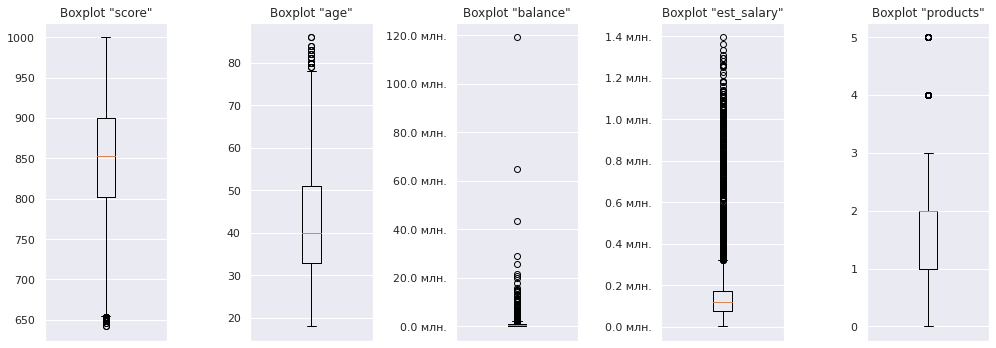

In [27]:
fig, axs = plt.subplots(1, 5, figsize=(14, 5)) #создаем область для графиков, содержащую одну строку и пять столбцов

for i in range(5):
    axs[i].boxplot(data_vibrosi[data_vibrosi.columns[i]].dropna()); #строим boxplot для i-го столбца данных, исключая пропущенные значения
    axs[i].set_title('Boxplot "{}"'.format(data_vibrosi.columns[i])); #задаем заголовок для графика, отражающий название столбца
    axs[i].set_xticks([]); #убираем метки по оси x для каждого графика boxplot
    if max(axs[i].get_yticks()) > 1000000:
        axs[i].set_yticklabels(['{:.1f} млн.'.format(x / 1000000) for x in axs[i].get_yticks()]) #преобразуем метки по оси y в миллионы, если условие выше истинно
        
plt.tight_layout()

Ниже рассмотрим выбросы. Обратим внимание:
- на значения продуктов 0,4,5 являются аномальными с математической точки зрения;
- на пользователей старше 80;
- на клиентов с большим балансом;
- на пользователей с низким кредитным скорингом.

In [28]:
data.query('age>80')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Ростов,Рыбинск,Ярославль,gender_2
1621,151166,916,Рыбинск,Ж,83,0,NaN,1,1,1,"55,681.820",0,0,1,0,0
1987,219132,827,Рыбинск,Ж,82,3,"275,391.310",2,0,0,"59,205.900",0,0,1,0,0
2063,115610,823,Ярославль,Ж,81,2,"139,576.560",2,0,1,"146,201.010",0,0,0,1,0
2795,214518,820,Ярославль,Ж,83,3,"1,137,456.030",3,0,0,"18,037.970",0,0,0,1,0
3272,207759,888,Ярославль,Ж,84,3,"1,287,558.900",2,0,1,"97,982.170",0,0,0,1,0
4387,117913,658,Рыбинск,Ж,81,0,NaN,1,1,1,"105,088.100",0,0,1,0,0
5602,151854,707,Ярославль,Ж,81,0,NaN,1,1,0,"102,360.770",0,0,0,1,0
5673,147965,854,Ярославль,Ж,81,3,"803,337.980",2,0,1,"50,386.820",0,0,0,1,0
8237,208065,785,Рыбинск,Ж,82,2,"1,221,645.780",3,1,1,"66,059.880",0,0,1,0,0
9176,116838,777,Ярославль,Ж,86,3,"772,929.830",1,1,1,"40,877.180",0,0,0,1,0


In [29]:
data.query('balance > 20000000')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Ростов,Рыбинск,Ярославль,gender_2
1059,114103,894,Ярославль,М,58,4,"64,866,210.150",2,1,1,"88,861.600",1,0,0,1,1
1846,114088,927,Ярославль,М,57,5,"43,277,099.840",3,0,1,"82,619.000",0,0,0,1,1
4721,228786,1000,Ярославль,М,45,5,"29,008,931.920",2,0,1,"811,804.540",0,0,0,1,1
6948,137434,1000,Ярославль,М,37,4,"20,906,155.510",2,1,1,"947,606.600",1,0,0,1,1
7597,156149,900,Ярославль,М,62,5,"119,113,552.010",2,1,1,"138,041.310",0,0,0,1,1
8484,221720,1000,Ярославль,Ж,35,5,"21,549,943.630",2,0,0,"1,051,902.650",0,0,0,1,0
9753,122015,885,Ярославль,М,64,4,"25,727,761.860",3,1,0,"168,746.900",0,0,0,1,1


In [30]:
data.query('products<1')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Ростов,Рыбинск,Ярославль,gender_2
8957,147837,962,Рыбинск,Ж,79,3,NaN,0,0,0,"25,063.960",1,0,1,0,0


In [31]:
data.query('products>3')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Ростов,Рыбинск,Ярославль,gender_2
76,213688,922,Ярославль,Ж,37,5,"1,214,707.380",4,0,1,"85,121.070",0,0,0,1,0
81,223978,850,Рыбинск,М,34,5,"351,583.160",4,0,1,"115,354.970",1,0,1,0,1
94,191870,821,Ростов,Ж,30,3,"157,677.780",4,0,1,"36,397.020",0,1,0,0,0
103,128618,841,Ростов,М,29,1,"175,505.110",4,1,1,"48,188.690",0,1,0,0,1
148,122769,868,Ростов,Ж,58,5,"1,334,745.590",4,0,1,"63,049.600",1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9941,223285,862,Ростов,М,46,3,"1,784,723.840",4,1,1,"202,524.280",1,1,0,0,1
9962,217489,893,Ярославль,Ж,49,5,"1,571,192.110",4,1,1,"151,217.990",1,0,0,1,0
9963,187204,957,Ярославль,М,35,4,"3,431,029.030",4,1,0,"354,987.430",1,0,0,1,1
9988,158678,889,Ярославль,М,35,4,"880,534.890",4,1,1,"126,564.610",0,0,0,1,1


In [32]:
data.query('score<650')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Ростов,Рыбинск,Ярославль,gender_2
265,157448,649,Рыбинск,М,37,0,NaN,1,1,1,"81,942.850",0,0,1,0,1
533,146648,649,Ярославль,М,33,0,NaN,1,1,1,"149,318.490",0,0,0,1,1
921,179302,646,Ярославль,М,37,0,NaN,1,1,1,"148,297.710",0,0,0,1,1
2532,151179,642,Рыбинск,М,69,0,NaN,1,1,1,"35,917.410",0,0,1,0,1
3168,173067,649,Ярославль,М,46,0,NaN,1,1,1,"121,654.310",0,0,0,1,1
4071,164000,648,Ярославль,М,28,0,NaN,1,1,0,"27,790.150",0,0,0,1,1
4690,135725,648,Ярославль,Ж,59,0,NaN,1,1,1,"50,326.030",0,0,0,1,0
5131,213745,646,Рыбинск,Ж,25,0,NaN,2,1,0,"60,562.330",0,0,1,0,0
6454,169067,649,Ярославль,М,55,0,NaN,1,1,1,"130,672.400",0,0,0,1,1
6751,182172,649,Ярославль,М,38,0,NaN,1,1,1,"170,288.900",0,0,0,1,1


Уберём выброс со значением продукта 0. Остальные данные оставим, чтобы не искажать метрику и не потерять лишние значения. Согласно логике - могут быть клиенты с плохим рейтингом, большим балансом, а также старше 80 лет.

In [33]:
data1 = data.query('products>0')
data.info()
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9974 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        9974 non-null   int64  
 1   score          9974 non-null   int64  
 2   city           9974 non-null   object 
 3   gender         9974 non-null   object 
 4   age            9974 non-null   int64  
 5   equity         9974 non-null   int64  
 6   balance        7695 non-null   float64
 7   products       9974 non-null   int64  
 8   credit_card    9974 non-null   int64  
 9   last_activity  9974 non-null   int64  
 10  est_salary     9974 non-null   float64
 11  churn          9974 non-null   int64  
 12  Ростов         9974 non-null   uint8  
 13  Рыбинск        9974 non-null   uint8  
 14  Ярославль      9974 non-null   uint8  
 15  gender_2       9974 non-null   int64  
dtypes: float64(2), int64(9), object(2), uint8(3)
memory usage: 1.1+ MB
<class 'pandas.core.frame.Dat

Итого, в процессе предобработки убрали в качестве выбросов 27 строк, что составляет менее 1% от первоначальных данных.

In [34]:
data1

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Ростов,Рыбинск,Ярославль,gender_2
0,183012,850,Рыбинск,Ж,25,1,"59,214.820",2,0,1,"75,719.140",1,0,1,0,0
1,146556,861,Рыбинск,Ж,37,5,"850,594.330",3,1,0,"86,621.770",0,0,1,0,0
2,120722,892,Рыбинск,Ж,30,0,NaN,1,1,1,"107,683.340",0,0,1,0,0
3,225363,866,Ярославль,Ж,51,5,"1,524,746.260",2,0,1,"174,423.530",1,0,0,1,0
4,157978,730,Ярославль,М,34,5,174.000,1,1,0,"67,353.160",1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,120553,814,Рыбинск,М,27,1,"78,144.650",1,0,1,"18,943.640",0,0,1,0,1
9996,139170,894,Ярославль,М,46,0,NaN,1,1,0,"196,898.290",0,0,0,1,1
9997,115639,903,Ярославль,М,24,0,NaN,2,1,1,"108,905.090",0,0,0,1,1
9998,148700,777,Ярославль,Ж,68,3,"865,457.970",3,0,1,"86,874.900",0,0,0,1,0


## Исследовательский анализ данных.

### Рассмотрим рапределение данных.

**Кредитный скоринг.**

In [35]:
data_analysis =  data1[['score', 'age', 'balance', 'est_salary']]

In [36]:
def plot_distribution(data,col,bins=30, xticks=[], xlabels=[]):
        h = sns.histplot(data[col], bins=bins, color ='red')
        plt.title(f'Распределение {col}')
        
        # Кастомизация оси Х
        if xlabels and xticks:
            h.set_xticks(xticks)
            h.set_xticklabels(xlabels)
        if xlabels:
            h.set_xticklabels(xlabels)
        if xticks:
            h.set_xticks(xticks)
            
        plt.show()

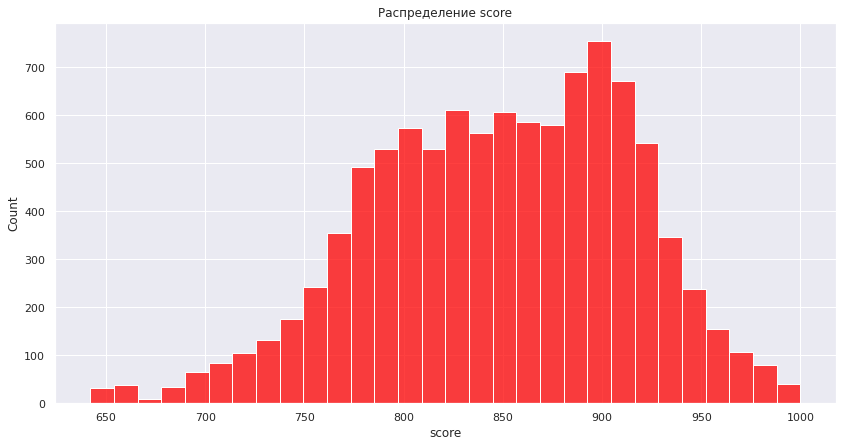

In [37]:
plot_distribution(data1, 'score')

In [38]:
print('Количество клиентов c рейтингом между 750 и 950:', len(data1.query('score > 700 & score < 950')))
print('Количество клиентов c рейтингом между 850 и 950:', len(data1.query('score > 850 & score < 900')))
print('Процент от общего числа клиентов:', round(len(data1.query('score > 700 & score < 950'))/len(data1)*100, 2))
print('Процент от общего числа клиентов:', round(len(data1.query('score > 850 & score < 950'))/len(data1)*100, 2))

Количество клиентов c рейтингом между 750 и 950: 9372
Количество клиентов c рейтингом между 850 и 950: 2590
Процент от общего числа клиентов: 93.97
Процент от общего числа клиентов: 46.78


94% клиентов с рейтингом от 750 до 950. Почти половина всех пользователей между 850 и 950.

**Возраст клиентов.**

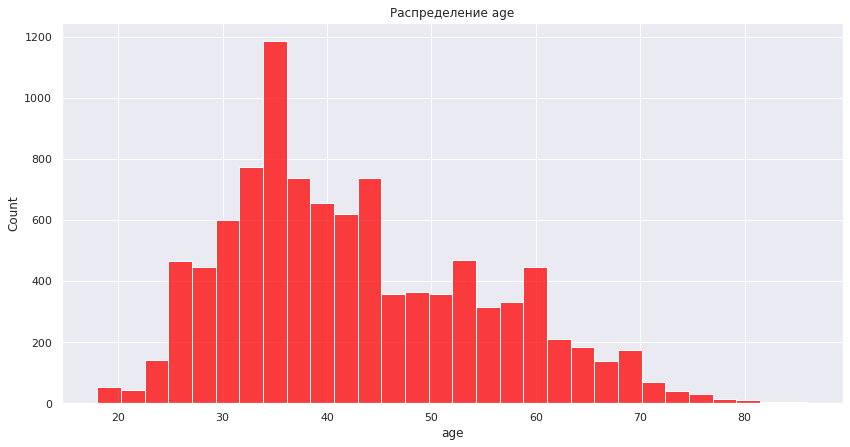

In [39]:
plot_distribution(data1,'age')

In [40]:
print('Количество клиентов возрастом от 25 до 70:', len(data1.query('age > 25 & age < 70')))
print('Процент от общего числа клиентов:', round(len(data1.query('age > 25 & age < 70'))/len(data1)*100, 2))
print('Количество клиентов возрастом от 30 до 50:', len(data1.query('age > 30 & age < 50')))
print('Процент от общего числа клиентов:', round(len(data1.query('age > 30 & age < 50'))/len(data1)*100, 2))
print('Количество клиентов возрастом от 50 до 60:', len(data1.query('age > 50 & age < 60')))
print('Процент от общего числа клиентов:', round(len(data1.query('age > 50 & age < 60'))/len(data1)*100, 2))

Количество клиентов возрастом от 25 до 70: 9389
Процент от общего числа клиентов: 94.14
Количество клиентов возрастом от 30 до 50: 5750
Процент от общего числа клиентов: 57.66
Количество клиентов возрастом от 50 до 60: 1410
Процент от общего числа клиентов: 14.14


Ожидаемо, 94% всех пользователей от 25 до 70 лет. ~58% от 30 до 50 лет.

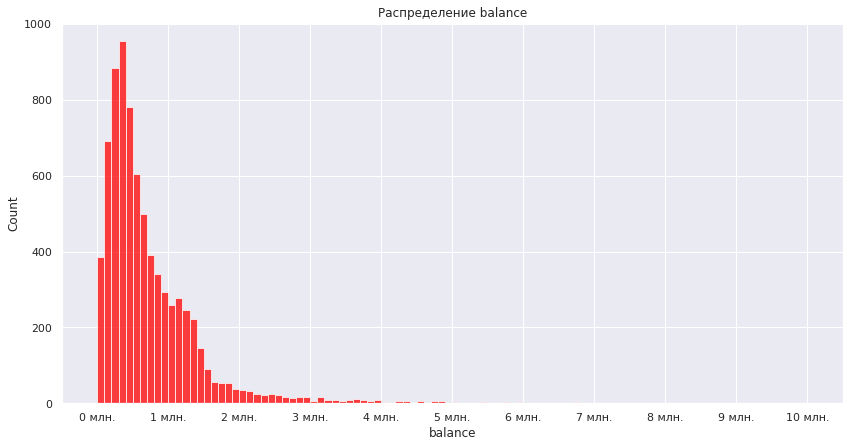

In [41]:
plot_distribution(
    data1,
    'balance',
    bins=[x for x in range(0, 10000001, 100000)],
    xticks=[x for x in range(0, 10000001, 1000000)],
    xlabels=['{:.0f} млн.'.format(x/1000000) for x in range(0, 10000001, 1000000)]
)

In [42]:
data1['balance'].describe()

count         7,695.000
mean        827,245.588
std       1,980,327.410
min               0.000
25%         295,698.715
50%         524,295.330
75%         980,051.215
max     119,113,552.010
Name: balance, dtype: float64

In [43]:
print('Количество клиентов с балансом от 0 до 100 000:', len(data1.query('balance > 0 & balance < 100000')))
print('Процент от общего числа клиентов:', round(len(data1.query('balance > 0 & balance < 100000'))/7674*100, 2))
print('Количество клиентов с балансом от 100 000 до 1 000 000:', len(data1.query('balance > 100000 & balance < 1000000')))
print('Процент от общего числа клиентов:', round(len(data1.query('balance > 100000 & balance < 1000000'))/7674*100, 2))
print('Количество клиентов с балансом от 1 000 000 до 20 000 000:', len(data1.query('balance > 1000000 & balance < 20000000')))
print('Процент от общего числа клиентов:', round(len(data1.query('balance > 1000000 & balance < 20000000'))/7674*100, 2))

Количество клиентов с балансом от 0 до 100 000: 383
Процент от общего числа клиентов: 4.99
Количество клиентов с балансом от 100 000 до 1 000 000: 5437
Процент от общего числа клиентов: 70.85
Количество клиентов с балансом от 1 000 000 до 20 000 000: 1866
Процент от общего числа клиентов: 24.32


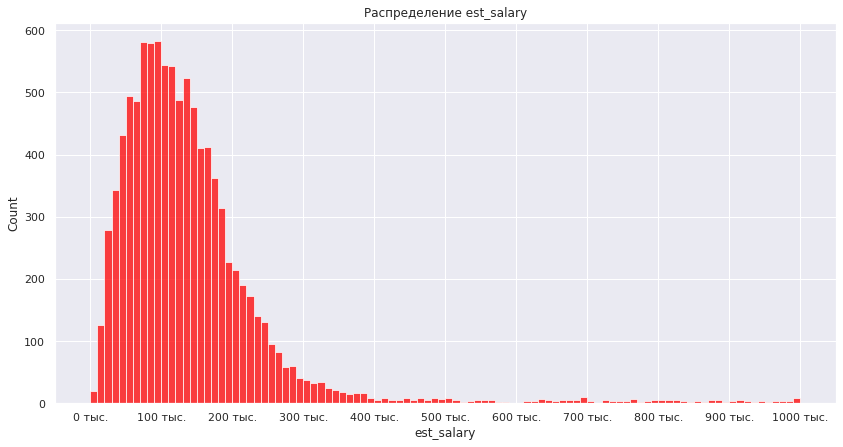

In [44]:
plot_distribution(
    data1,
    'est_salary',
    bins=[x for x in range(0, 1000001, 10000)], 
    xticks=[x for x in range(0, 1000001, 100000)],
    xlabels=['{:.0f} тыс.'.format(x/1000) for x in range(0, 1000001, 100000)]
)

In [45]:
print('Количество клиентов с оценочным доходом клиента от 0 до 100 000:', len(data1.query('est_salary > 0 & est_salary < 100000')))
print('Процент от общего числа клиентов:', round(len(data1.query('est_salary > 0 & est_salary < 100000'))/len(data1)*100, 2))
print('Количество клиентов клиентов с оценочным доходом от 100 000 до 1 000 000:', len(data1.query('est_salary > 100000 & est_salary < 1000000')))
print('Процент от общего числа клиентов:', round(len(data1.query('est_salary > 100000 & est_salary < 1000000'))/len(data1)*100, 2))
print('Количество клиентов клиентов с оценочным доходом от 1 000 000 до 20 000 000:', len(data1.query('est_salary > 1000000 & est_salary < 20000000')))
print('Процент от общего числа клиентов:', round(len(data1.query('est_salary > 1000000 & est_salary < 20000000'))/len(data1)*100, 2))

Количество клиентов с оценочным доходом клиента от 0 до 100 000: 3924
Процент от общего числа клиентов: 39.35
Количество клиентов клиентов с оценочным доходом от 100 000 до 1 000 000: 5990
Процент от общего числа клиентов: 60.06
Количество клиентов клиентов с оценочным доходом от 1 000 000 до 20 000 000: 59
Процент от общего числа клиентов: 0.59


График имеет нормальный вид распределения, с пиком в районе 100 000 рублей.

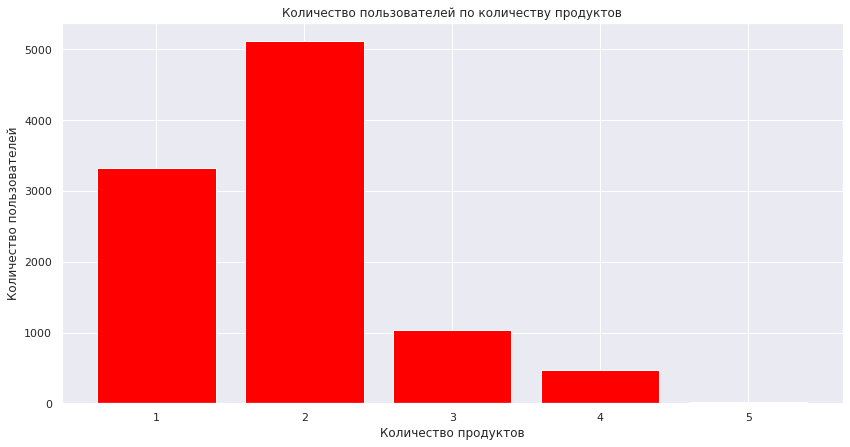

In [46]:
product_counts = data1['products'].value_counts()

# Построение графика
plt.bar(product_counts.index, product_counts.values, color='red')
plt.xlabel('Количество продуктов')
plt.ylabel('Количество пользователей')
plt.title('Количество пользователей по количеству продуктов')
plt.xticks(product_counts.index)
plt.show()

In [47]:
print('Количество клиентов с 1 продуктом:', len(data1.query('products == 1')))
print('Процент от общего числа клиентов:', round(len(data1.query('products == 1'))/len(data1)*100, 2))
print('Количество клиентов с 2 продуктами:', len(data1.query('products == 2')))
print('Процент от общего числа клиентов:', round(len(data1.query('products == 2'))/len(data1)*100, 2))
print('Количество клиентов с 3 продуктами:', len(data1.query('products == 3')))
print('Процент от общего числа клиентов:', round(len(data1.query('products == 3'))/len(data1)*100, 2))
print('Количество клиентов с 4 продуктами:', len(data1.query('products == 4')))
print('Процент от общего числа клиентов:', round(len(data1.query('products == 4'))/len(data1)*100, 2))

Количество клиентов с 1 продуктом: 3323
Процент от общего числа клиентов: 33.32
Количество клиентов с 2 продуктами: 5119
Процент от общего числа клиентов: 51.33
Количество клиентов с 3 продуктами: 1038
Процент от общего числа клиентов: 10.41
Количество клиентов с 4 продуктами: 474
Процент от общего числа клиентов: 4.75


33% клиентов пользуются лишь 1 продуктом банка, 51% (больше половины) пользуются 2 продуктами.
На группы с 3 и 4 продуктами в совокупности приходится 15%.

In [48]:
def plot_pie(data1, column, color):
    counts = data[column].value_counts()
    labels = counts.index
    values = counts.values
    
    plt.figure(figsize=(8, 6))
    plt.pie(values, labels=labels, colors=color, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')
    plt.title(f'Распределение клиентов по полю {column}')
    plt.show()

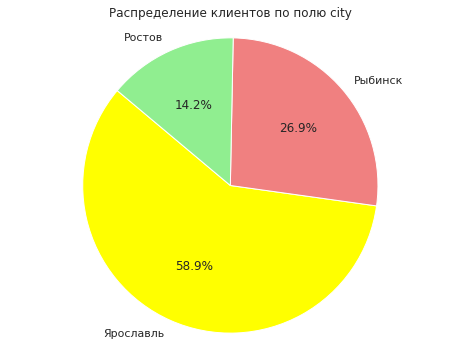

In [49]:
plot_pie(data1, 'city', ['yellow', 'lightcoral', 'lightgreen'])

Ожидаемо, на региональный центр приходится 59% всех клиентов, на втором месте Рыбинск, Ростов последний.

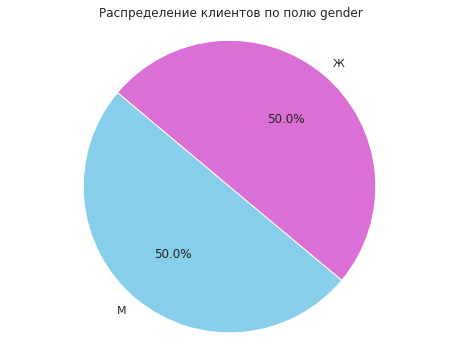

In [50]:
plot_pie(data1, 'gender', ['skyblue', 'orchid'])

Равенство по гендерному признаку в количественном эквиваленте.

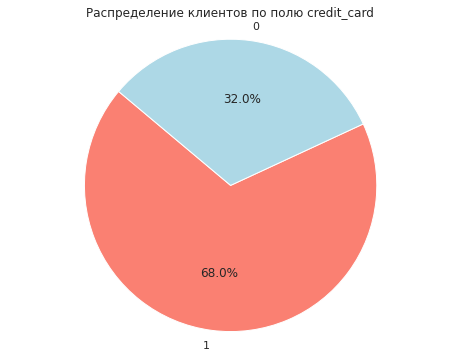

In [51]:
plot_pie(data1, 'credit_card', ['salmon', 'lightblue'])

Клиенты с кредитной картой превосходят в количестве пользователей без кредитки больше чем в 2 раза.

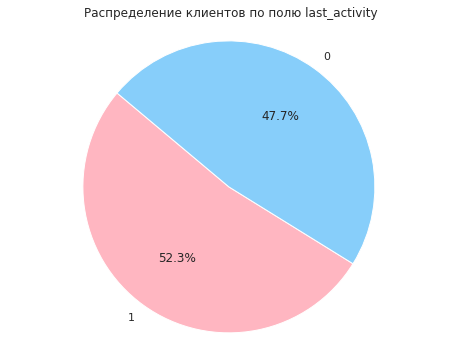

In [52]:
plot_pie(data1, 'last_activity', ['lightpink', 'lightskyblue'])

Активных пользователей на 4.6% больше.

### Рассмотрим корреляцию оттока по признакам.

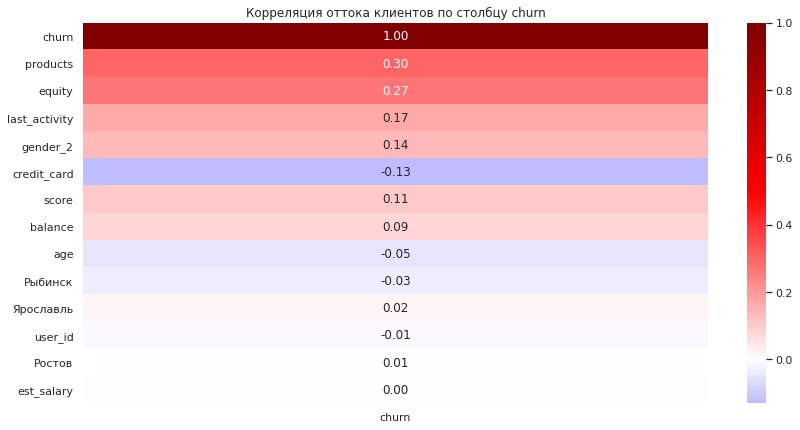

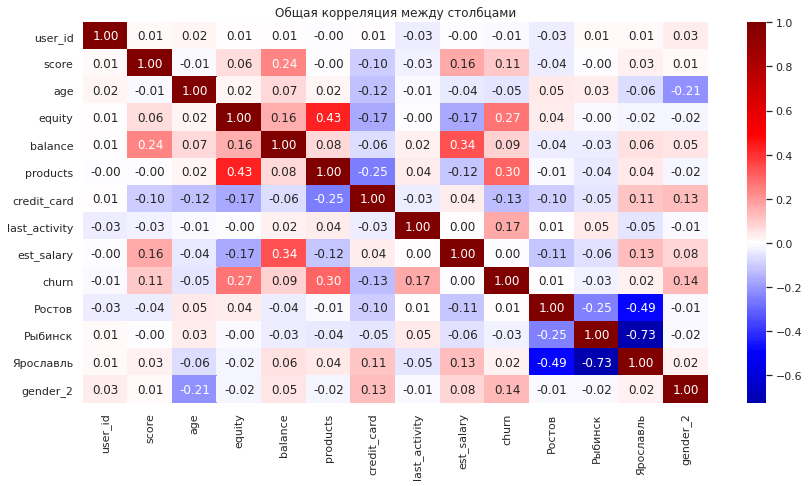

In [53]:
data1['churn'] = pd.to_numeric(data['churn'])
churn_corr = data1.corr()['churn'].sort_values(ascending=False, key=abs)

plt.figure()
sns.heatmap(churn_corr.to_frame(), cmap='seismic', center=0, annot=True, fmt='.2f')
plt.title('Корреляция оттока клиентов по столбцу churn')

plt.figure()
sns.heatmap(data.corr(), cmap='seismic', center=0, annot=True, fmt='.2f')
plt.title('Общая корреляция между столбцами')
plt.show()

Согласно шкале Чеддока слабая корреляция оттока заметна со следующими столбцами, которые выделяются на фоне других:
- количество продуктов;
- количество баллов собственности.

Также можно обратить внимание на активность клиента, баланс на счёте, гендерный признак, использование/неиспользование кредитной карты и баллы кредитного скоринга.

### Исследование оттока по значениям признаков.

Количество продуктов

In [54]:
churn_products = data1.groupby('products')['churn'].agg(['sum', 'count']).reset_index()
churn_products['%'] = churn_products['sum'] / churn_products['count'] * 100
churn_products = churn_products[['products', 'sum', 'count', '%']].set_index('products')
churn_products

,sum,count,%
products,,,
1,235,3323,7.072
2,978,5119,19.105
3,297,1038,28.613
4,300,474,63.291
5,8,19,42.105


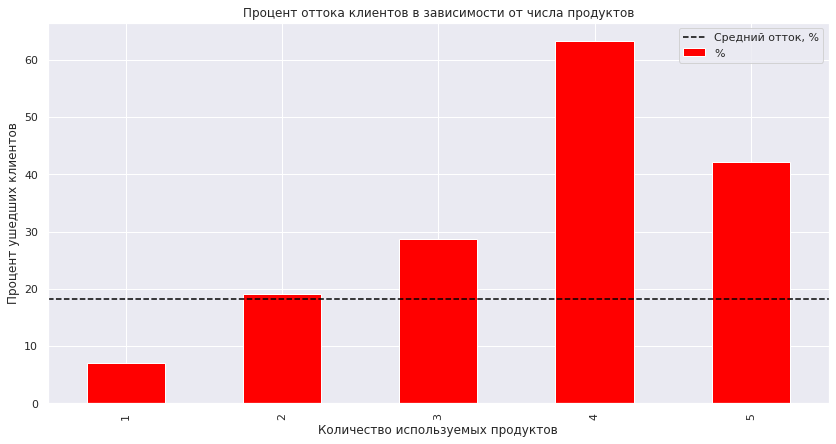

In [55]:
churn_products['%'].plot(kind='bar', title='Процент оттока клиентов в зависимости от числа продуктов',
xlabel='Количество используемых продуктов', ylabel='Процент ушедших клиентов', color='red')
plt.axhline(y=100*(data1['churn'].mean()), color='black', linestyle = '--', label='Средний отток, %')
plt.legend()
plt.show()

Высокий уровень оттока у пользователей с 3-5 продуктами, но они немногочислены. На фоне многочисленных когорт "выделяются" пользователи 2-мя продуктами 19% соответственно. Ниже среднего уровня по оттоку - только пользователи, пользующиеся 1 продуктом.

Количество баллов собственности.

In [56]:
churn_equity = data.groupby('equity').agg({'churn': ['count', 'mean']})
churn_equity.columns = ['count', '%']
churn_equity = churn_equity.reset_index()
churn_equity

,equity,count,%
0,0,2576,0.035
1,1,773,0.120
2,2,1051,0.158
3,3,1541,0.209
4,4,1847,0.251
5,5,1915,0.301
6,6,161,0.360
7,7,80,0.463
8,8,17,0.353
9,9,13,0.538


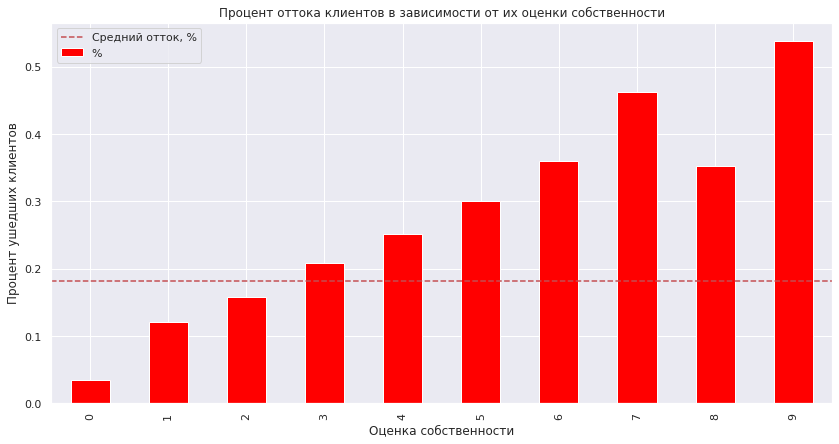

In [57]:
churn_equity['%'].plot(
    kind='bar', 
    title = 'Процент оттока клиентов в зависимости от их оценки собственности',
    xlabel = 'Оценка собственности', 
    ylabel = 'Процент ушедших клиентов', 
    color = 'red')
plt.axhline(y=data1['churn'].mean(), color='r', linestyle = '--', label='Средний отток, %')
plt.legend()
plt.show()

У всех когорт пользователей с количеством баллов собственности выше 2 наблюдается уровень оттока выше среднего. Стоит обратить уровень на категории с баллами 3-5 из-за их насыщенности.

Активность клиента

In [58]:
churn_activity = data1.groupby('last_activity')['churn'].agg(['sum', 'count']).reset_index()
churn_activity['%'] = churn_activity['sum'] / churn_activity['count'] * 100
churn_activity

,last_activity,sum,count,%
0,0,541,4758,11.370
1,1,1277,5215,24.487


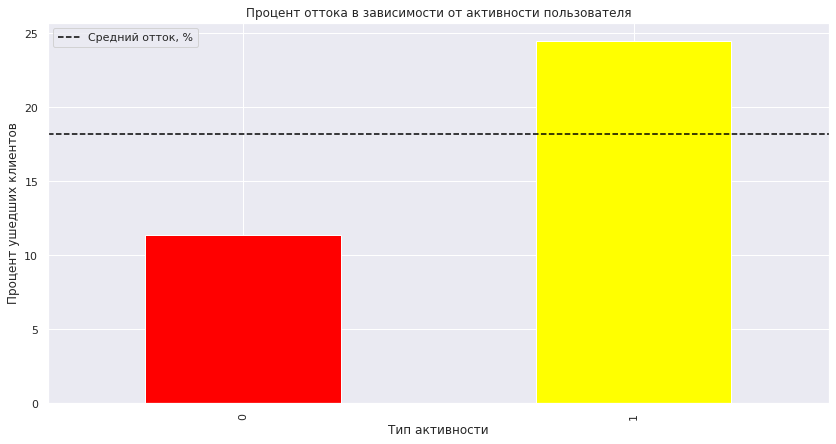

In [59]:
churn_activity['%'].plot(
    kind='bar', title = 'Процент оттока в зависимости от активности пользователя',
    xlabel = 'Тип активности', ylabel = 'Процент ушедших клиентов', color=['red','yellow'])
plt.axhline(y=100*(data1['churn'].mean()), color='black', linestyle = '--')
plt.legend(['Средний отток, %']);

У активных пользователей уровень оттока намного выше. 24,5% против 11,4% у активных.

Распределение баланса

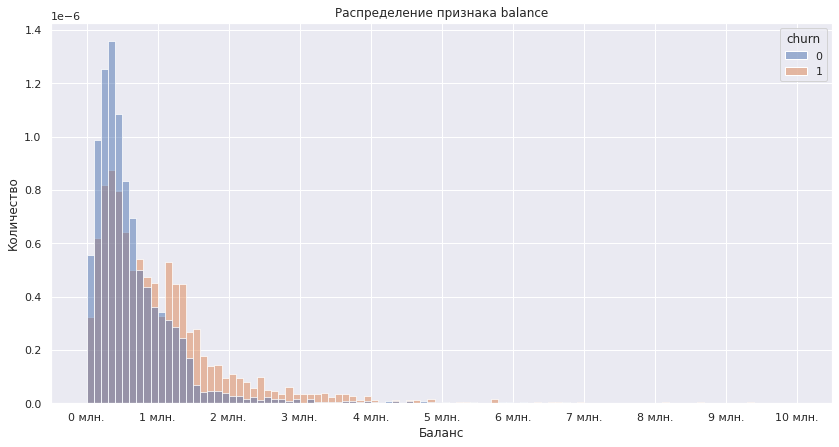

In [60]:
sns.histplot(data=data1, x='balance', hue="churn", stat="density", common_norm=False, bins=[x for x in range(0, 10000001, 100000)])
plt.title('Распределение признака balance')
plt.ylabel("Количество")
plt.xlabel('Баланс')
plt.xticks([x for x in range(0, 10000001, 1000000)], ['{:.0f} млн.'.format(x/1000000) for x in range(0, 10000001, 1000000)])
plt.show()

У уходящих пользователей бросается в глаза представительство в распределении баланса на более высоком уровне. Простыми словами - у них больше денег на счетах.

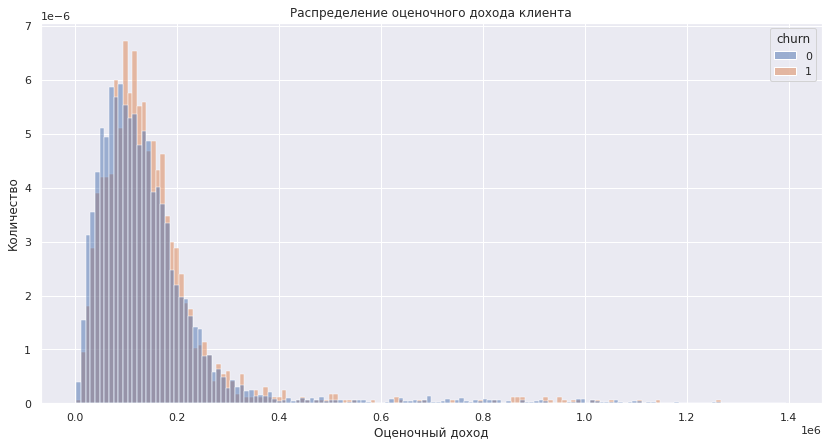

In [61]:
sns.histplot(data=data1, x='est_salary', hue="churn", stat="density", common_norm=False)
plt.title('Распределение оценочного дохода клиента')
plt.ylabel("Количество")
plt.xlabel('Оценочный доход')
plt.show()

Распределение баллов кредитного скоринга

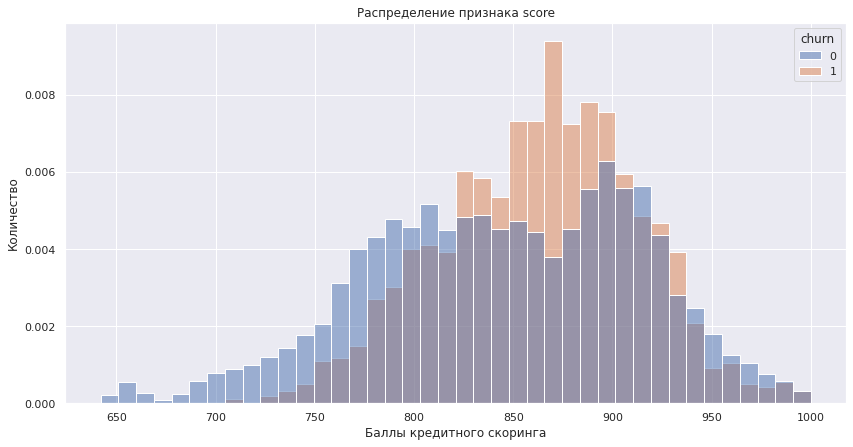

In [62]:
sns.histplot(data=data1, x='score', hue="churn", stat="density", common_norm=False)
plt.title('Распределение признака score')
plt.ylabel("Количество")
plt.xlabel('Баллы кредитного скоринга')
plt.show()

Уходящие пользователи имеют хорошие оценки кредитного скоринга, наибольшее представительство в диапазоне от 850 до 900.

Отток среди мужчин и женщин.

In [63]:
churn_gender = data1.groupby('gender')['churn'].agg(['sum', 'count']).reset_index()
churn_gender['%'] = churn_gender['sum'] / churn_gender['count'] * 100
churn_gender = churn_gender[['gender', 'sum', 'count', '%']].set_index('gender')
churn_gender.sort_values(by='%', ascending=False)

,sum,count,%
gender,,,
М,1183,4991,23.703
Ж,635,4982,12.746


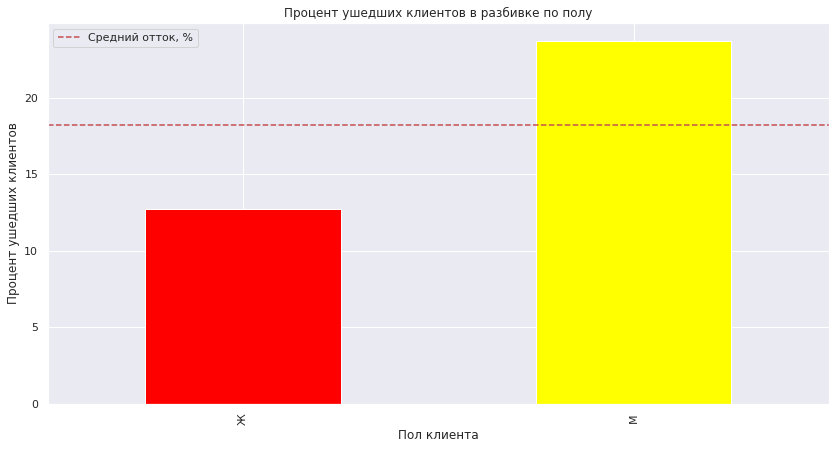

In [64]:
churn_gender['%'].plot(
    kind='bar', title = 'Процент ушедших клиентов в разбивке по полу',
    xlabel = 'Пол клиента', ylabel = 'Процент ушедших клиентов',
    color=['red','yellow'])
plt.axhline(y=100*(data1['churn'].mean()), color='r', linestyle = '--')
plt.legend(['Средний отток, %']);

У мужчин отток почти в 2 раза выше, несмотря на равенство по соотношению.

Посмотрим отточность по городам.

In [65]:
churn_city = data1.groupby('city')['churn'].agg(['sum', 'count']).reset_index()
churn_city['%'] = churn_city['sum'] / churn_city['count'] * 100
churn_city = churn_city[['city', 'sum', 'count', '%']].set_index('city')
churn_city

,sum,count,%
city,,,
Ростов,265,1416,18.715
Рыбинск,436,2682,16.257
Ярославль,1117,5875,19.013


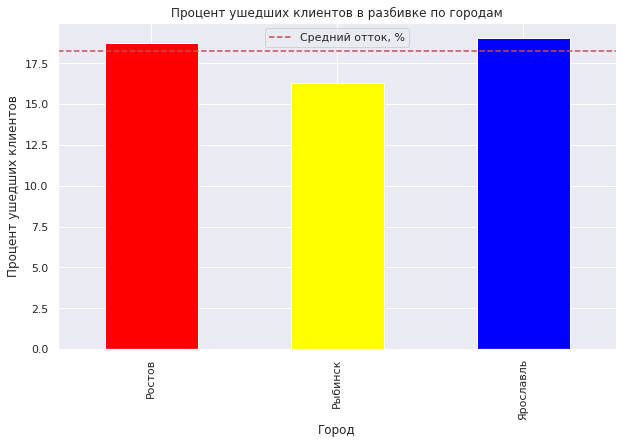

In [66]:
churn_city['%'].plot(
    kind='bar', title='Процент ушедших клиентов в разбивке по городам',
    xlabel='Город', ylabel='Процент ушедших клиентов', figsize=(10, 6),
    color=['red', 'yellow', 'blue'])
plt.axhline(y=100*(data1['churn'].mean()), color='r', linestyle = '--')
plt.legend(['Средний отток, %']);

Большой разницы в оттоке между городами нет, но выделяется Ярославль с 19% и самым большим представительством по количеству клиентов.

Отточность по возрасту.

In [67]:
data1[data1['churn']==1]['age'].describe()

count   1,818.000
mean       41.430
std        11.145
min        18.000
25%        32.000
50%        39.000
75%        52.000
max        75.000
Name: age, dtype: float64

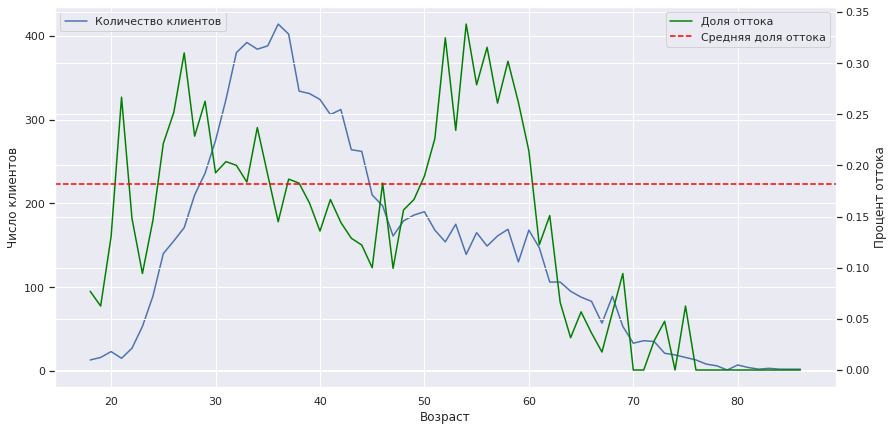

In [68]:
churn_by_age = data1.groupby('age')['churn'].agg(['count', 'sum']).reset_index()

churn_by_age['churn_rate'] = churn_by_age['sum'] / churn_by_age['count']

mean_churn_rate = churn_by_age['sum'].sum() / churn_by_age['count'].sum()


fig, ax = plt.subplots(figsize=(14, 7))
ax.plot(churn_by_age['age'], churn_by_age['count'], label='Количество клиентов')
ax2 = ax.twinx()
ax2.plot(churn_by_age['age'], churn_by_age['churn_rate'], color='green', label='Доля оттока')
ax2.axhline(mean_churn_rate, color='red', linestyle='--', label='Средняя доля оттока')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
ax.set_xlabel('Возраст')
ax.set_ylabel('Число клиентов')
ax2.set_ylabel('Процент оттока')
plt.show()

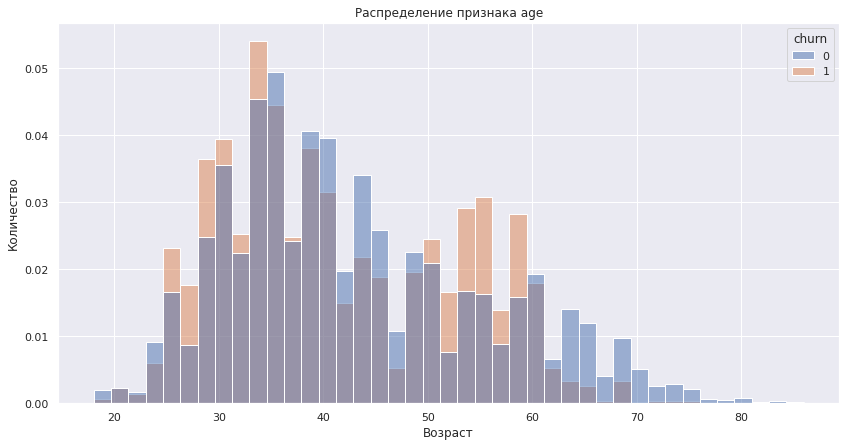

In [69]:
sns.histplot(data=data1, x='age', hue="churn", stat="density", common_norm=False)
plt.title('Распределение признака age')
plt.ylabel("Количество")
plt.xlabel('Возраст')
plt.show()

Видим уровень оттока выше среднего на интервале от 25 до 35 лет, а также максимальную долю оттока на интервале от 50 до 60 лет.

Отточность по кредитной карте.

In [70]:
churn_сredit_card = data1.groupby('credit_card')['churn'].agg(['sum', 'count'])
churn_сredit_card['%'] = churn_сredit_card['sum'] / churn_сredit_card['count'] * 100
churn_сredit_card

,sum,count,%
credit_card,,,
0,815,3189,25.557
1,1003,6784,14.785


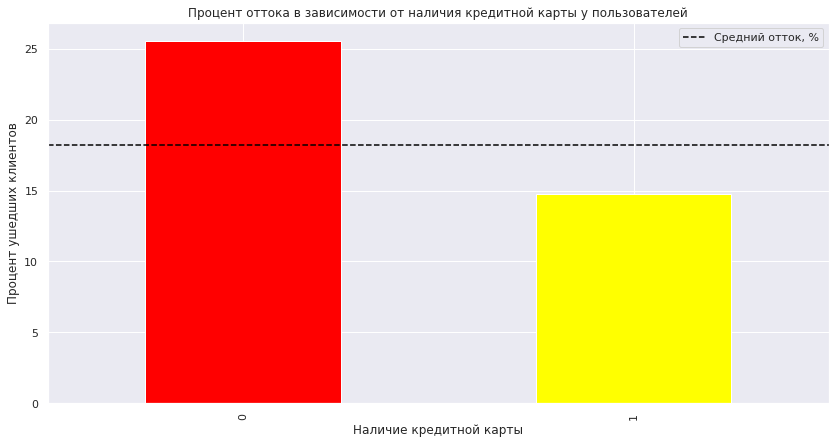

In [71]:
churn_сredit_card['%'].plot(
    kind='bar', title = 'Процент оттока в зависимости от наличия кредитной карты у пользователей',
    xlabel = 'Наличие кредитной карты', ylabel = 'Процент ушедших клиентов', color=['red','yellow'])
plt.axhline(y=100*(data1['churn'].mean()), color='black', linestyle = '--')
plt.legend(['Средний отток, %']);

Отток у клиентов без кредитки на 10% выше, чем у тех, у кого она есть.

### Выявим критерии для сегментации клиентов.

После проведенных корреляционного и исследовательского анализов данных мы видим, что наибольшая зависимость наблюдается между оттоком и количеством продуктов, которыми используется клиент. Далее идут следующие столбцы:
- количество баллов собственности
- активность клиента;
- баланс на счёте;
- гендерный признак;
- использование/неиспользование кредитной карты и баллы кредитного скоринга.

В результате более явно выделяются следующие параметры пользователей склонных к оттоку:
- Пользователи с количеством продуктов больше 2;
- Пользователи без крединой карты;
- Более активные;
- Мужчины;
- С баллом собственности больше 2;
- Из Ярославля или Ростова;



## Проверка статистических гипотез.


### Формулировка гипотез.

**1 гипотеза.**

О различии возраста между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним.

Нулевая гипотеза (H0): Среднее значение возраста клиентов, использующих два продукта банка, не отличается от среднего значения возраста клиентов, использующих один продукт.

Альтернативная гипотеза (H1): Среднее значение возраста клиентов, использующих два продукта банка, отличается от среднего значения возраста клиентов, использующих один продукт.

**2 гипотеза.**

Гипотеза о различии баллов собственности между отточными и неотточными клиентами.

Нулевая гипотеза (H0): Средние значения баллов собственности лояльных и отточных клиентов равны.
    
Альтернативная гипотеза (H1): Средние значения баллов собственности лояльных и отточных клиентов различаются.

###  Обоснование применения метода оценивания.

#### Гипотеза 1.

Перед тем как определиться с выбором метода для оценивания, взглянем на наши выборки.

In [72]:
#1 гипотеза
prod_1 = data1.query('products == 1')
prod_1

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Ростов,Рыбинск,Ярославль,gender_2
2,120722,892,Рыбинск,Ж,30,0,NaN,1,1,1,"107,683.340",0,0,1,0,0
4,157978,730,Ярославль,М,34,5,174.000,1,1,0,"67,353.160",1,0,0,1,1
9,133130,906,Ярославль,Ж,67,0,NaN,1,0,1,"238,055.530",0,0,0,1,0
10,148929,927,Ростов,М,52,0,NaN,1,1,1,"196,820.070",0,1,0,0,1
11,172184,921,Ростов,М,41,0,NaN,1,1,1,"217,469.480",0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9990,162357,822,Ярославль,М,31,3,"646,575.170",1,1,1,"88,297.630",0,0,0,1,1
9991,122366,840,Ярославль,Ж,44,3,"326,619.710",1,1,0,"157,589.590",0,0,0,1,0
9993,219924,884,Рыбинск,Ж,36,0,NaN,1,1,1,"169,844.880",0,0,1,0,0
9995,120553,814,Рыбинск,М,27,1,"78,144.650",1,0,1,"18,943.640",0,0,1,0,1


In [73]:
prod_2 = data1.query('products == 2')
prod_2

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Ростов,Рыбинск,Ярославль,gender_2
0,183012,850,Рыбинск,Ж,25,1,"59,214.820",2,0,1,"75,719.140",1,0,1,0,0
3,225363,866,Ярославль,Ж,51,5,"1,524,746.260",2,0,1,"174,423.530",1,0,0,1,0
7,218868,825,Ярославль,Ж,38,4,"458,145.400",2,1,1,"68,085.480",0,0,0,1,0
8,211686,923,Ярославль,М,54,5,"1,206,337.870",2,1,0,"155,371.790",0,0,0,1,1
12,132970,845,Ярославль,Ж,31,3,"591,928.520",2,1,1,"112,697.160",1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9986,152986,822,Ярославль,М,58,5,"1,434,857.910",2,0,1,"83,442.410",1,0,0,1,1
9987,151279,783,Рыбинск,Ж,61,3,"387,916.160",2,1,0,"63,160.960",1,0,1,0,0
9992,167165,813,Рыбинск,М,48,2,"179,765.620",2,1,0,"133,972.110",1,0,1,0,1
9994,114186,851,Ростов,М,42,3,"370,912.790",2,1,0,"102,123.930",1,1,0,0,1


Получили выборки из 3299 и 5106 строк соответственно для проверки первой гипотезы.

Критерии, которые должны выполняться для проведения T теста:

1)Генеральные совокупности не зависят друг от друга. \\**Всё верно.**

2)Выборочные средние нормально распределены. \\**Проверим ниже.**

3)В зависимости от равенства, или различия дисперсий исследуемых генеральных совокупностей мы должны определить параметр equal_var функции st.ttest. \\**Проверим ниже.**

In [74]:
print('Мода 1 набора данных равна', prod_1['age'].mode()[0])
print('Медиана 1 исходного набора данных равна', prod_1['age'].median())
print('Среднее арифметическое 1 набора данных равно', prod_1['age'].mean())

print('Мода 2 набора данных равна', prod_2['age'].mode()[0])
print('Медиана 2 исходного набора данных равна', prod_2['age'].median())
print('Среднее арифметическое 2 набора данных равно', prod_2['age'].mean())

Мода 1 набора данных равна 36
Медиана 1 исходного набора данных равна 40.0
Среднее арифметическое 1 набора данных равно 42.19620824556124
Мода 2 набора данных равна 33
Медиана 2 исходного набора данных равна 40.0
Среднее арифметическое 2 набора данных равно 42.76890017581559


Выборочные средние нормально распределены. Используем F-тест Фишера для проверки дисперсий наших выборок.

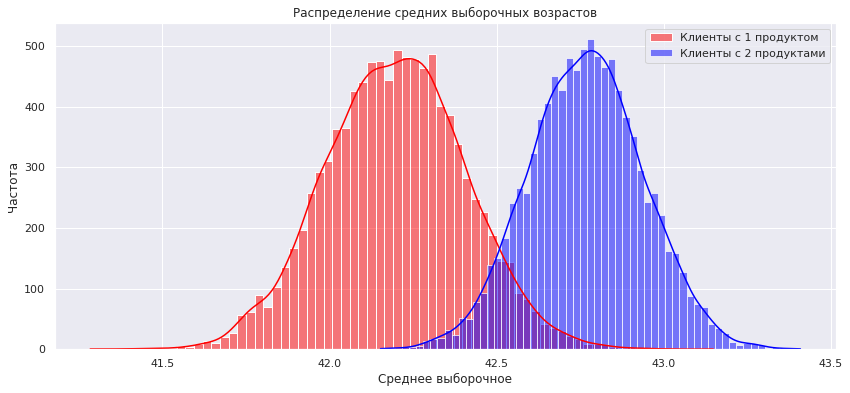

In [75]:
# Задаем количество средних выборочных
N = 10000

# Создаем пустые массивы для хранения всех средних выборочных
means_1 = []
means_2 = []

# Цикл для извлечения выборок и вычисления средних для первого графика
for _ in range(N):
    sample = prod_1.sample(frac=1, replace=True)
    sample_mean = sample['age'].mean()
    means_1.append(sample_mean)

# Цикл для извлечения выборок и вычисления средних для второго графика
for _ in range(N):
    sample = prod_2.sample(frac=1, replace=True)
    sample_mean = sample['age'].mean()
    means_2.append(sample_mean)

# Визуализация распределения средних выборочных на одном графике
plt.figure(figsize=(14, 6))
sns.histplot(means_1, kde=True, color='red', label='Клиенты с 1 продуктом')
sns.histplot(means_2, kde=True, color='blue', label='Клиенты с 2 продуктами')
plt.xlabel('Среднее выборочное')
plt.ylabel('Частота')
plt.title('Распределение средних выборочных возрастов')
plt.legend()
plt.show()

Видим нормальное распределение у обоих графиков.

In [76]:
sample1 = prod_1['age']
sample2 = prod_2['age']

In [77]:
def fisher_test(sample1, sample2):
    alpha = 0.05
    var1 = np.var(sample1, ddof=1)  # Вычисляем выборочную дисперсию для первой выборки
    var2 = np.var(sample2, ddof=1)  # Вычисляем выборочную дисперсию для второй выборки
    
    F = var1 / var2 if var1 >= var2 else var2 / var1  # Рассчитываем значение статистики F
    
    # Вычисляем p-value для теста Фишера
    df1 = len(sample1) - 1
    df2 = len(sample2) - 1
    p_value = 2 * min(f.cdf(F, df1, df2), 1 - f.cdf(F, df1, df2))
    
    if p_value < alpha:
        print('Отвергаем нулевую гипотезу')
    else:
        print('Не получилось отвергнуть нулевую гипотезу')
    
    return F, p_value

In [78]:
F, p_value = fisher_test(sample1, sample2)

Не получилось отвергнуть нулевую гипотезу


In [79]:
print(f'Статистика F: {F}')
print(f'p-value: {p_value}')

Статистика F: 1.0286869620798407
p-value: 0.36775475197213536


Результаты f теста Фишера показывают, что не можем отвергнуть нулевую гипотезу о равенстве дисперсий двух выборок. Делаем выбор о проверки основной гипотезы в пользу двухвыборочного Т-теста.

#### Гипотеза 2.

In [80]:
equ_1 = data1.query('churn == 0') #первая выборка
equ_1

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Ростов,Рыбинск,Ярославль,gender_2
1,146556,861,Рыбинск,Ж,37,5,"850,594.330",3,1,0,"86,621.770",0,0,1,0,0
2,120722,892,Рыбинск,Ж,30,0,NaN,1,1,1,"107,683.340",0,0,1,0,0
5,202305,856,Рыбинск,М,56,4,"863,687.240",3,1,0,"156,619.800",0,0,1,0,1
6,177259,807,Ярославль,Ж,39,3,"405,042.440",3,0,1,"103,838.320",0,0,0,1,0
7,218868,825,Ярославль,Ж,38,4,"458,145.400",2,1,1,"68,085.480",0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,120553,814,Рыбинск,М,27,1,"78,144.650",1,0,1,"18,943.640",0,0,1,0,1
9996,139170,894,Ярославль,М,46,0,NaN,1,1,0,"196,898.290",0,0,0,1,1
9997,115639,903,Ярославль,М,24,0,NaN,2,1,1,"108,905.090",0,0,0,1,1
9998,148700,777,Ярославль,Ж,68,3,"865,457.970",3,0,1,"86,874.900",0,0,0,1,0


In [81]:
equ_2 = data1.query('churn == 1') #вторая выборка
equ_2

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Ростов,Рыбинск,Ярославль,gender_2
0,183012,850,Рыбинск,Ж,25,1,"59,214.820",2,0,1,"75,719.140",1,0,1,0,0
3,225363,866,Ярославль,Ж,51,5,"1,524,746.260",2,0,1,"174,423.530",1,0,0,1,0
4,157978,730,Ярославль,М,34,5,174.000,1,1,0,"67,353.160",1,0,0,1,1
12,132970,845,Ярославль,Ж,31,3,"591,928.520",2,1,1,"112,697.160",1,0,0,1,0
40,129705,811,Рыбинск,М,34,2,"129,799.350",1,0,0,"96,242.710",1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9981,154871,892,Рыбинск,М,39,5,"636,287.720",2,0,1,"227,288.270",1,0,1,0,1
9986,152986,822,Ярославль,М,58,5,"1,434,857.910",2,0,1,"83,442.410",1,0,0,1,1
9987,151279,783,Рыбинск,Ж,61,3,"387,916.160",2,1,0,"63,160.960",1,0,1,0,0
9992,167165,813,Рыбинск,М,48,2,"179,765.620",2,1,0,"133,972.110",1,0,1,0,1


In [82]:
print('Мода 1 набора данных равна', equ_1['equity'].mode()[0]) #исследуем средние
print('Медиана 1 исходного набора данных равна', equ_1['equity'].median())
print('Среднее арифметическое 1 набора данных равно', equ_1['equity'].mean())

print('Мода 2 набора данных равна', equ_2['equity'].mode()[0])
print('Медиана 2 исходного набора данных равна', equ_2['equity'].median())
print('Среднее арифметическое 2 набора данных равно', equ_2['equity'].mean())

Мода 1 набора данных равна 0
Медиана 1 исходного набора данных равна 3.0
Среднее арифметическое 1 набора данных равно 2.378295524218271
Мода 2 набора данных равна 5
Медиана 2 исходного набора данных равна 4.0
Среднее арифметическое 2 набора данных равно 3.7634763476347635


In [83]:
sample3 = equ_1['equity']
sample4 = equ_2['equity']

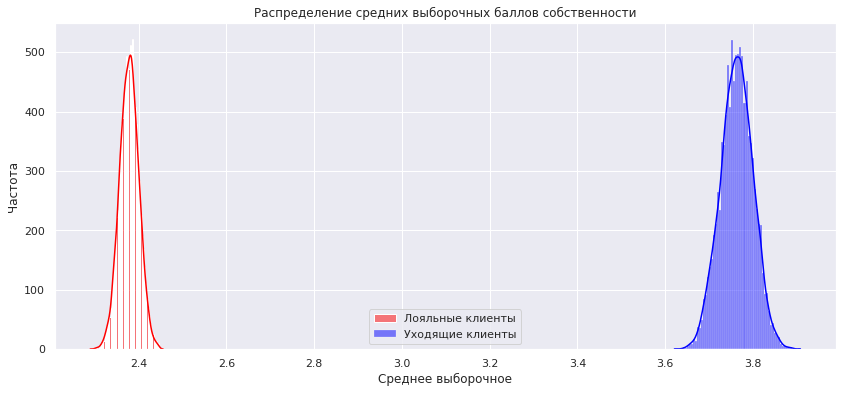

In [84]:
# Задаем количество средних выборочных
N = 10000

# Создаем пустые массивы для хранения всех средних выборочных
means_1 = []
means_2 = []

# Цикл для извлечения выборок и вычисления средних для первого графика
for _ in range(N):
    sample = equ_1.sample(frac=1, replace=True)
    sample_mean = sample['equity'].mean()
    means_1.append(sample_mean)

# Цикл для извлечения выборок и вычисления средних для второго графика
for _ in range(N):
    sample = equ_2.sample(frac=1, replace=True)
    sample_mean = sample['equity'].mean()
    means_2.append(sample_mean)

# Визуализация распределения средних выборочных на одном графике
plt.figure(figsize=(14, 6))
sns.histplot(means_1, kde=True, color='red', label='Лояльные клиенты')
sns.histplot(means_2, kde=True, color='blue', label='Уходящие клиенты')
plt.xlabel('Среднее выборочное')
plt.ylabel('Частота')
plt.title('Распределение средних выборочных баллов собственности')
plt.legend()
plt.show()

Выборочные средние нормально распределены.

In [85]:
def fisher_test1(sample3, sample4): #исследуем дисперсии
    alpha = 0.05
    var1 = np.var(sample3, ddof=1)  # Вычисляем выборочную дисперсию для первой выборки
    var2 = np.var(sample4, ddof=1)  # Вычисляем выборочную дисперсию для второй выборки
    
    F1 = var1 / var2 if var1 >= var2 else var2 / var1  # Рассчитываем значение статистики F
    
    # Вычисляем p-value для теста Фишера
    df1 = len(sample3) - 1
    df2 = len(sample4) - 1
    p_value1 = 2 * min(f.cdf(F1, df1, df2), 1 - f.cdf(F1, df1, df2))
    
    if p_value1 < alpha:
        print('Отвергаем нулевую гипотезу')
    else:
        print('Не получилось отвергнуть нулевую гипотезу')
    
    return F1, p_value1

In [86]:
F1, p_value1 = fisher_test1(sample3, sample4)

Отвергаем нулевую гипотезу


In [87]:
print(f'Статистика F: {F1}')
print(f'p-value: {p_value1}')

Статистика F: 1.5435649576245336
p-value: 2.220446049250313e-16


Средние распределены нормально, но дисперсии отличаются. Делаем выбор в пользу метода Манна-Уитни.
Вот несколько случаев, когда можно использовать метод Манна-Уитни для проверки гипотезы о двух выборках:

1. Когда данные в выборках не имеют нормального распределения;

2. Когда выборки имеют различные размеры;

3. Когда данные в выборках содержат выбросы или аномалии;

4. Когда требуется сравнивать упорядоченные данные;

5. Когда требуется провести непараметрический анализ гипотезы.

###  Проверка и интерпретация результата.

#### 1 гипотеза.

Нулевая гипотеза (H0): Среднее значение возраста клиентов, использующих два продукта банка, не отличается от среднего значения возраста клиентов, использующих один продукт.

Альтернативная гипотеза (H1): Среднее значение возраста клиентов, использующих два продукта банка, отличается от среднего значения возраста клиентов, использующих один продукт.

In [88]:
alpha = 0.05

# Проводим ttest для двух выборок

results = st.ttest_ind(prod_1['age'],
                       prod_2['age'],
                       equal_var=False,
                       alternative='two-sided')

print(f'p-value: {results.pvalue}')

# Проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-value: 0.03299080704232691
Отвергаем нулевую гипотезу


Основываясь на тесте, у нас достаточно оснований полагать, что разница между средними возрастами статистически значима. 

#### 2 гипотеза.

Нулевая гипотеза (H0): Средние значения баллов собственности лояльных и отточных клиентов равны.

Альтернативная гипотеза (H1): Средние значения баллов собственности лояльных и отточных клиентов различаются.

In [89]:
alpha = 0.05
results = st.mannwhitneyu(equ_1['equity'],equ_2['equity'])
print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение:  2.0457230851173855e-157
Отвергаем нулевую гипотезу: разница статистически значима


У нас достаточно оснований полагать, что средние значения баллов собственности лояльных и отточных клиентов различаются.

## Промежуточные выводы.

На входе мы получили датафрейм с 10 000 клиентов банка "Метанпром". С помощью функции привели названия столбцов к нижнему регистру, явных дубликатов не обнаружили, были пропуски в столбцах 'age' и 'balance'. 23% и 3% от всех данных соответственно.

Характер пропусков в колонке 'age' может носить случайный характер или же пользователи намеренно не указывали его, в любом случае их процент незначителен, удалили их, чтобы привести age к типу 'int'. Увидели сильную зависимость пропусков в 'balance' от 'equity' и 'products'. Отнесли пропуски в 'balance' к Неслучайным, оставили их, чтобы не искажать метрику по другим признакам.

Добавили новые столбцы для идентификации города каждого клиента, а также для разделения мужчин и женщин по полу. Проверели данные на неявные дубликаты. Проработали выбросы, убрали аномальные значения по верхним и нижним границам. Итого, в процессе предобработки убрали в качестве выбросов 23 строк, что составляет менее 1% от первоначальных данных.

В процессе анализа распределения обнаружили:
- 94% клиентов с рейтингом от 750 до 950, Почти половина всех пользователей между 850 и 950;
- 94% всех пользователей от 25 до 70 лет, ~58% от 30 до 50 лет;
- 70% всех клиентов с балансом от 100 000 до 1 000 000, 24% от 1 000 000 до 20 000 000;
- 39% пользователей с оценочным доходом от 0 до 100 000, 60% с доходом от 100 000 до 1 000 000;
- на Ярославль приходится 59% всех клиентов, на Рыбинск 27%, Ростов последний с 14%;
- Равенство по гендерному признаку в количественном эквиваленте;
- Клиенты с кредитной картой превосходят в количестве пользователей без кредитки больше чем в 2 раза;
- Активных пользователей на 4.6% больше.

На данном этапе сложно выделить конкретные признаки оттока клиентно, однако, благодаря корреляционному анализу выявили поля, которые коррелируют с оттоком больше всего на фоне других:
- количество продуктов;
- количество баллов собственности.

Также можно обратить внимание на активность клиента, баланс на счёте, гендерный признак, использование/неиспользование кредитной карты и баллы кредитного скоринга. Максимальный уровень корреляции - слабый/умеренный. Кредитная карта помогает сохранять клиентов.

После исследования оттока по значениям признаков можно сделать вывод:
- Высокий уровень оттока у пользователей с 3-5 продуктами, но они немногочислены. На фоне многочисленных когорт "выделяются" пользователи с 2-мя продуктами - 19% отток. Ниже среднего уровня по оттоку - только пользователи, пользующиеся одним продуктом;
- У всех когорт пользователей с количеством баллов собственности выше 3 наблюдается уровень оттока выше среднего. Стоит обратить уровень на категории с баллами 3-5 из-за их насыщенности;
- У активных пользователей уровень оттока на 13 п.п., чем у неактивных;
- У уходящих пользователей бросается в глаза представительство в распределении баланса на более высоком уровне. Простыми словами - у них больше денег на счетах;
- Уходящие пользователи имеют хорошие оценки кредитного скоринга, наибольшее представительство в диапазоне от 850 до 900;
- У мужчин отток почти на 11 п.п. выше, несмотря на равенство по соотношению;
- Большой разницы в оттоке между городами нет, но выделяются клиенты из Ярославля. У них 19% отток и самое большое представительство по клиентам;
- Видим уровень оттока выше среднего на интервале от 25 до 35 лет, а также максимальную долю оттока на интервале от 50 до 60 лет;
- Отток у клиентов без кредитки на 10 процентных пунктов выше, чем у тех, у кого она есть.

В результате, на данном этапе, более явно выделяются следующие параметры, влияющие на отток:
- Пользователи с количеством продуктов больше 2;
- Пользователи без крединой карты;
- Более активные;
- Мужчины;
- С баллом собственности больше 2;
- Из Ярославля или Ростова.

В процессе статистического анализа данных проверили гипотезы:
- О различии возраста между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним; Всё-таки есть разница между средним возрастом клиентов с 1 продуктом и 2 продуктами;
- О различии баллов собственности между отточными и неотточными клиентами; Средние значения баллов собственности лояльных и отточных клиентов различаются.

## Сегментация на основе  выделенных показателей.

В процессе исследования мы взаимодействовали с данными разных видов: дискретные, бинарные, непрерывные - в связи с этим опираться лишь только на результаты корреляционного анализа не стоит. Выделим сегменты пользователей, которые находятся за пределами +-5п.п. от общего оттока. Наиболее подверженные оттоку сегменты по дискретным признакам и средний процент по ним мы определили. Для отбора сегментов по непрерывным признакам обратимся к промежуточным выводам и пункту 3.3.

In [90]:
data1['churn'].mean()

0.18229218891005716

Проверим диапазон для пользователей со значением баланса от 1 000 000 до 2 000 000.

In [91]:
data1.query('balance >=1000000 & balance <=2000000')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Ростов,Рыбинск,Ярославль,gender_2
3,225363,866,Ярославль,Ж,51,5,"1,524,746.260",2,0,1,"174,423.530",1,0,0,1,0
8,211686,923,Ярославль,М,54,5,"1,206,337.870",2,1,0,"155,371.790",0,0,0,1,1
15,120260,731,Рыбинск,М,42,3,"1,480,548.470",3,1,0,"160,974.430",0,0,1,0,1
20,114192,772,Ростов,М,43,3,"1,315,511.650",2,0,0,"143,935.710",0,1,0,0,1
35,221927,863,Ростов,М,39,5,"1,461,423.330",1,0,1,"221,699.520",0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9949,183238,800,Рыбинск,Ж,67,5,"1,035,024.100",2,1,1,"50,308.760",0,0,1,0,0
9962,217489,893,Ярославль,Ж,49,5,"1,571,192.110",4,1,1,"151,217.990",1,0,0,1,0
9977,158143,807,Ростов,М,43,4,"1,124,809.480",1,1,1,"185,230.600",1,1,0,0,1
9986,152986,822,Ярославль,М,58,5,"1,434,857.910",2,0,1,"83,442.410",1,0,0,1,1


In [92]:
data1.query('balance >=1000000 & balance <=2000000')['churn'].mean()

0.35408022130013833

In [93]:
data1.query('balance<=1000000')['churn'].mean()

0.18619031260735142

In [94]:
data1.query('balance>=2000000')['churn'].mean()

0.4918032786885246

Видим отток 35% у группы с балансом от 1 000 000 до 2 000 000 000, 49% отток у группы с доходом более 2 000 000.

**Рассмотрим кредитный скоринг.**

In [95]:
data1.query('score >=850 & score <=900')['churn'].mean()

0.26456577500916084

In [96]:
data1.query('score < 850')['churn'].mean()

0.13948186528497408

In [97]:
data1.query('score > 900')['churn'].mean()

0.17486564696155435

Видим отток 35% у группы с рейтингом от 850 до 900, возьмём её.

In [98]:
data1.query('age<=35')['churn'].mean()

0.211485870556062

In [99]:
data1.query('age >= 50 & age<=60')['churn'].mean()

0.2647058823529412

In [100]:
data1.query('age>35 & age<=60')['churn'].mean()

0.18690265486725663

In [101]:
data1.query('age>35')['churn'].mean()

0.1679137982639928

Возьмём интервал от 50 до 60 лет.

В первый сегмент определим пользователей-мужчин > 2 продуктами, кредитным скорингом от 750 до 950.

In [102]:
group1 = data1.query('products > 2 & score>= 750 & score <=950 & gender_2 == 1')
group1

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Ростов,Рыбинск,Ярославль,gender_2
5,202305,856,Рыбинск,М,56,4,"863,687.240",3,1,0,"156,619.800",0,0,1,0,1
72,156677,873,Ярославль,М,39,5,"915,959.850",3,0,1,"154,034.620",1,0,0,1,1
81,223978,850,Рыбинск,М,34,5,"351,583.160",4,0,1,"115,354.970",1,0,1,0,1
95,172823,855,Ярославль,М,41,1,"312,743.280",3,0,0,"268,100.870",0,0,0,1,1
103,128618,841,Ростов,М,29,1,"175,505.110",4,1,1,"48,188.690",0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9930,179096,782,Ярославль,М,55,1,"218,820.710",3,0,0,"62,248.200",0,0,0,1,1
9938,154435,861,Рыбинск,М,43,4,"448,896.950",3,0,0,"169,994.660",0,0,1,0,1
9941,223285,862,Ростов,М,46,3,"1,784,723.840",4,1,1,"202,524.280",1,1,0,0,1
9970,175730,816,Рыбинск,М,36,4,"477,892.070",3,1,0,"81,100.600",0,0,1,0,1


In [103]:
group1['churn'].mean()

0.5064935064935064

51% оттока на 30 п.п. больше, чем в среднем по всему датасету.

Во вторую групппу отберём женщин < 3 продуктами, рейтингом < 850, без кредитной карты.

In [104]:
group2 = data1.query('products < 3 & score < 850 & credit_card == 0 & gender_2 == 0')
group2

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Ростов,Рыбинск,Ярославль,gender_2
13,166357,837,Рыбинск,Ж,28,4,"302,249.220",2,0,1,"30,950.940",0,0,1,0,0
23,118314,732,Ярославль,Ж,48,2,"163,725.370",2,0,1,"133,528.020",0,0,0,1,0
32,219185,828,Ярославль,Ж,45,3,"409,634.940",2,0,0,"134,770.400",0,0,0,1,0
38,220711,794,Ростов,Ж,26,2,"147,487.390",2,0,1,"24,912.880",0,1,0,0,0
71,141119,792,Ростов,Ж,48,5,"552,231.350",2,0,1,"116,971.720",0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9950,140903,815,Ростов,Ж,32,2,"357,710.220",2,0,1,"109,905.850",0,1,0,0,0
9960,170212,802,Рыбинск,Ж,47,3,"486,215.690",2,0,0,"92,961.670",0,0,1,0,0
9961,136500,841,Рыбинск,Ж,49,3,"446,187.270",2,0,0,"123,253.480",0,0,1,0,0
9979,191231,766,Ярославль,Ж,63,0,"232,261.190",2,0,1,"90,311.960",0,0,0,1,0


In [105]:
group2['churn'].mean()

0.09728867623604466

Имеем уровень оттока 10%.

В 3 группу отбираем пользователей с балансом от 1 000 000, в возрасте от 50 до 60 лет.

In [106]:
group3 = data1.query('balance >=1000000 & age >= 50 & age<=60')
group3

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Ростов,Рыбинск,Ярославль,gender_2
3,225363,866,Ярославль,Ж,51,5,"1,524,746.260",2,0,1,"174,423.530",1,0,0,1,0
8,211686,923,Ярославль,М,54,5,"1,206,337.870",2,1,0,"155,371.790",0,0,0,1,1
36,199614,822,Ярославль,М,60,5,"1,472,483.770",1,1,1,"89,132.670",0,0,0,1,1
41,206939,814,Рыбинск,М,56,2,"1,067,536.400",2,1,0,"95,563.190",0,0,1,0,1
85,165331,846,Ростов,Ж,50,5,"1,303,130.780",2,0,0,"218,591.450",0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9861,179288,908,Ярославль,Ж,55,5,"2,036,988.280",4,1,1,"122,581.490",1,0,0,1,0
9877,225431,830,Ярославль,М,53,4,"1,220,272.890",2,1,0,"88,456.170",1,0,0,1,1
9944,205255,769,Ярославль,Ж,60,4,"1,409,579.650",2,1,1,"66,316.670",0,0,0,1,0
9986,152986,822,Ярославль,М,58,5,"1,434,857.910",2,0,1,"83,442.410",1,0,0,1,1


In [107]:
group3['churn'].mean()

0.4822222222222222

47% оттока в 3 группе.

### Анализ ключевых показателей.

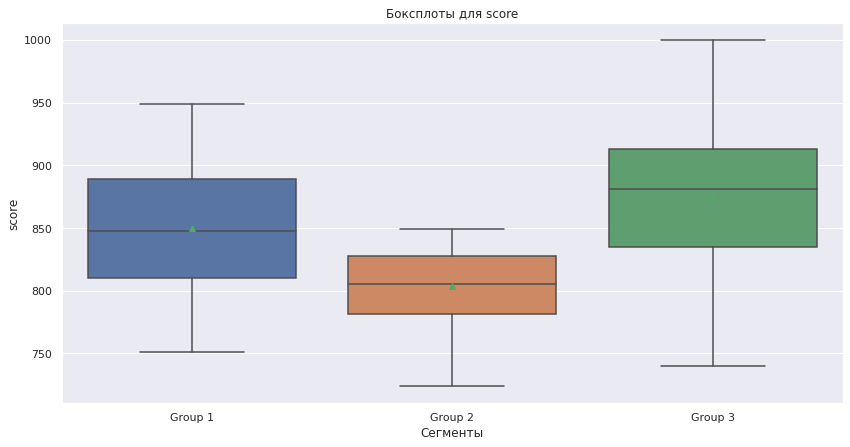

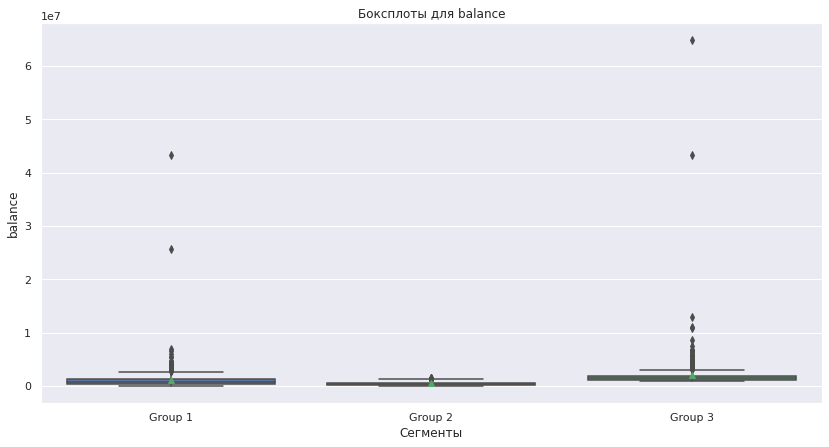

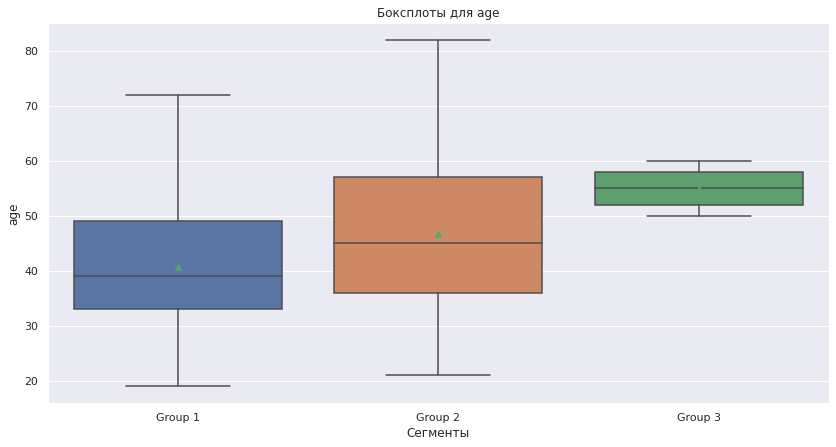

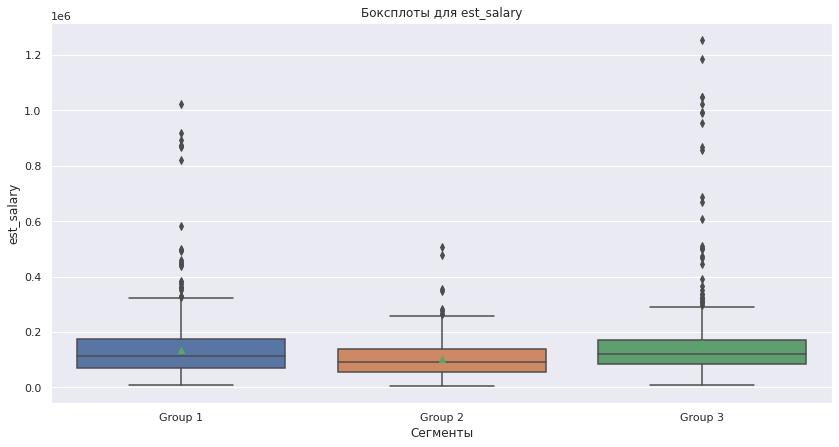

In [108]:
# Создание списка датафреймов
datasets = [group1, group2, group3]

# Список названий для графиков
labels = ['Group 1', 'Group 2', 'Group 3']

# Список столбцов для анализа
columns = ['score', 'balance', 'age', 'est_salary']

# Создание графиков для каждого столбца
for col in columns:
    data2 = [df[col] for df in datasets]
    
    plt.figure(figsize=(14, 7))
    sns.boxplot(data=data2, showmeans=True)
    plt.title(f"Боксплоты для {col}")
    plt.xlabel("Сегменты")
    plt.ylabel(col)
    plt.xticks(ticks=range(len(labels)), labels=labels)
    plt.show()

1 группа.

In [109]:
group1['churn'].mean()

0.5064935064935064

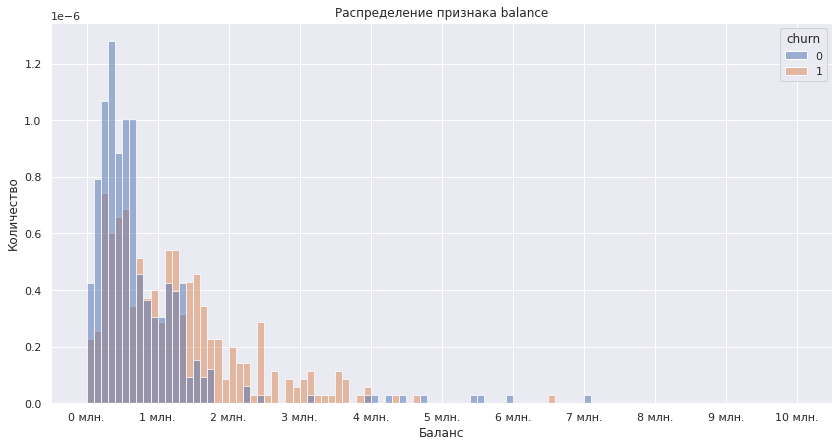

In [110]:
sns.histplot(data=group1, x='balance', hue="churn", stat="density", common_norm=False, bins=[x for x in range(0, 10000001, 100000)])
plt.title('Распределение признака balance')
plt.ylabel("Количество")
plt.xlabel('Баланс')
plt.xticks([x for x in range(0, 10000001, 1000000)], ['{:.0f} млн.'.format(x/1000000) for x in range(0, 10000001, 1000000)])
plt.show()

In [111]:
group1.query('balance >= 1000000 & balance <5000000')['churn'].mean()

0.70703125

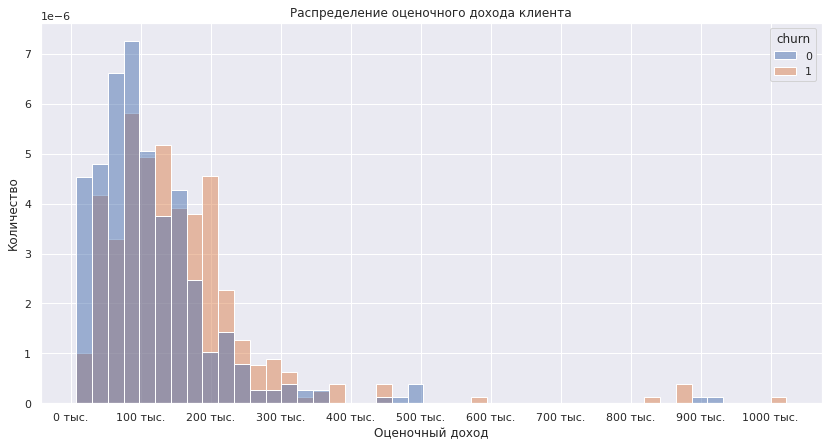

In [112]:
sns.histplot(data=group1, x='est_salary', hue="churn", stat="density", common_norm=False)
plt.title('Распределение оценочного дохода клиента')
plt.ylabel("Количество")
plt.xlabel('Оценочный доход')
plt.xticks([x for x in range(0, 1000001, 100000)], ['{:.0f} тыс.'.format(x/1000) for x in range(0, 1000001, 100000)])
plt.show()

In [113]:
group1.query('est_salary > 100000 & balance < 1000000')['churn'].mean()

0.48295454545454547

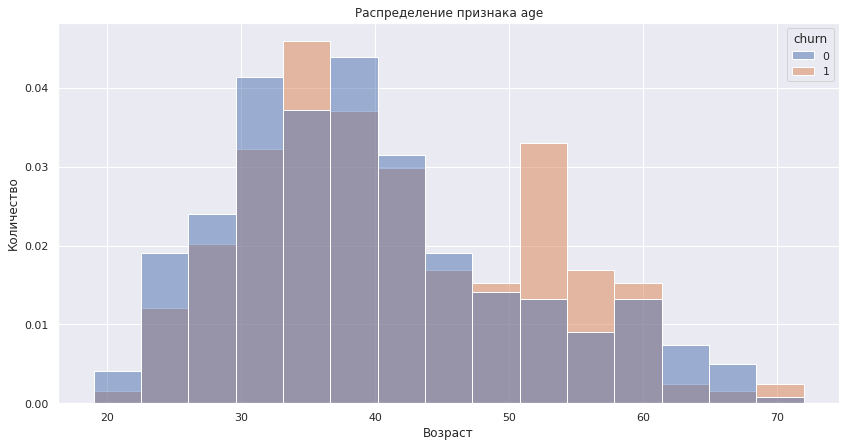

In [114]:
sns.histplot(data=group1, x='age', hue="churn", stat="density", common_norm=False)
plt.title('Распределение признака age')
plt.ylabel("Количество")
plt.xlabel('Возраст')
plt.show()

In [115]:
group1.query('age >= 50 & age <=60')['churn'].mean()

0.6541353383458647

In [116]:
churn_equity1 = group1.groupby('equity').agg({'churn': ['count', 'mean']})
churn_equity1.columns = ['count', '%']
churn_equity1 = churn_equity1.reset_index()
churn_equity1

,equity,count,%
0,0,31,0.226
1,1,34,0.412
2,2,56,0.339
3,3,89,0.551
4,4,186,0.484
5,5,240,0.579
6,6,35,0.543
7,7,17,0.588
8,8,3,1.000
9,9,2,0.500


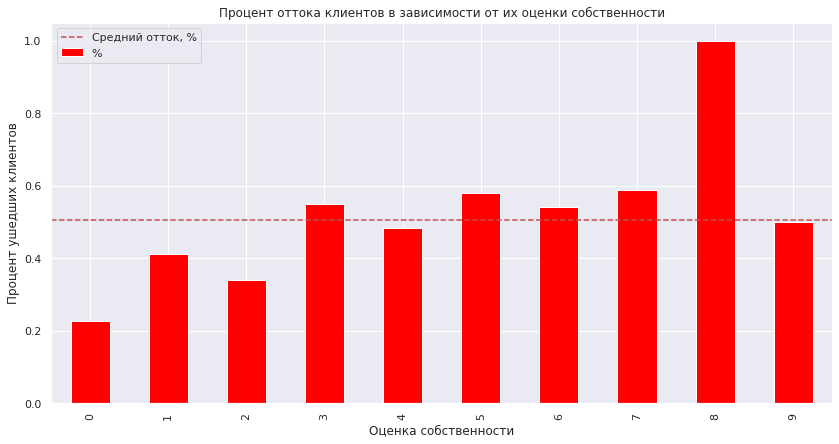

In [117]:
churn_equity1['%'].plot(
    kind='bar', 
    title = 'Процент оттока клиентов в зависимости от их оценки собственности',
    xlabel = 'Оценка собственности', 
    ylabel = 'Процент ушедших клиентов', 
    color = 'red')
plt.axhline(y=group1['churn'].mean(), color='r', linestyle = '--', label='Средний отток, %')
plt.legend()
plt.show()

В первом сегменте средний отток клиентов составил 51%. Отток выше этого уровня наблюдается у людей, входящих в следующие категории:
- с балансом от 1 000 000 до 5 000 000. Там уровень оттока на 20 п.п. выше среднего по сегменту;
- возрастом от 50 до 60 лет. Уровень оттока на 14 п.п. выше среднего по сегменту;
- с баллом собственности 8.

2 группа.

In [118]:
group2['churn'].mean()

0.09728867623604466

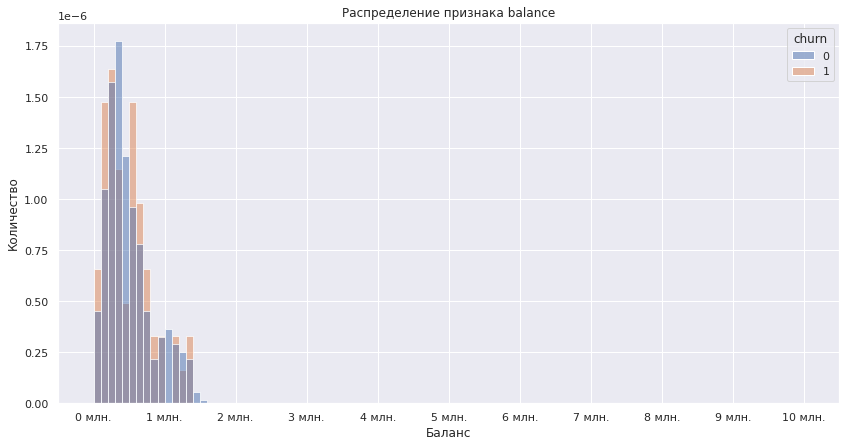

In [119]:
sns.histplot(data=group2, x='balance', hue="churn", stat="density", common_norm=False, bins=[x for x in range(0, 10000001, 100000)])
plt.title('Распределение признака balance')
plt.ylabel("Количество")
plt.xlabel('Баланс')
plt.xticks([x for x in range(0, 10000001, 1000000)], ['{:.0f} млн.'.format(x/1000000) for x in range(0, 10000001, 1000000)])
plt.show()

In [120]:
group2.query('balance >500000 & balance <=900000')['churn'].mean()

0.13636363636363635

In [121]:
group2.query('balance <=200000')['churn'].mean()

0.13541666666666666

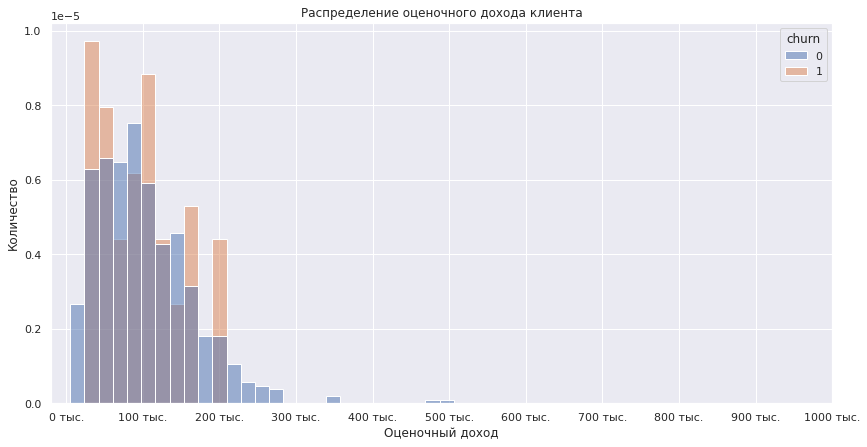

In [122]:
sns.histplot(data=group2, x='est_salary', hue="churn", stat="density", common_norm=False)
plt.title('Распределение оценочного дохода клиента')
plt.ylabel("Количество")
plt.xlabel('Оценочный доход')
plt.xticks([x for x in range(0, 1000001, 100000)], ['{:.0f} тыс.'.format(x/1000) for x in range(0, 1000001, 100000)])
plt.show()

In [123]:
group2.query('est_salary >= 200000 & est_salary <= 220000')['churn'].mean()

0.19047619047619047

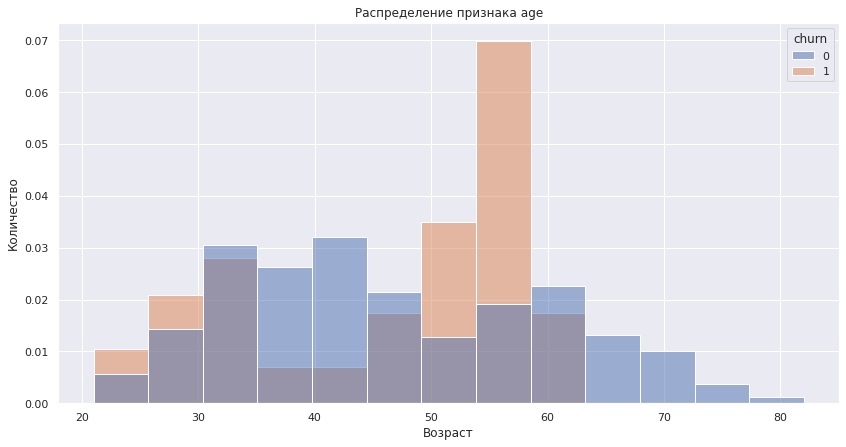

In [124]:
sns.histplot(data=group2, x='age', hue="churn", stat="density", common_norm=False)
plt.title('Распределение признака age')
plt.ylabel("Количество")
plt.xlabel('Возраст')
plt.show()

In [125]:
group2.query('age >= 50 & age <=58')['churn'].mean()

0.2608695652173913

In [126]:
group2.query('age <=30')['churn'].mean()

0.14516129032258066

In [127]:
churn_equity2 = group2.groupby('equity').agg({'churn': ['count', 'mean']})
churn_equity2.columns = ['count', '%']
churn_equity2 = churn_equity2.reset_index()
churn_equity2

,equity,count,%
0,0,72,0.167
1,1,70,0.057
2,2,97,0.113
3,3,157,0.089
4,4,134,0.082
5,5,89,0.079
6,6,6,0.167
7,7,2,0.500


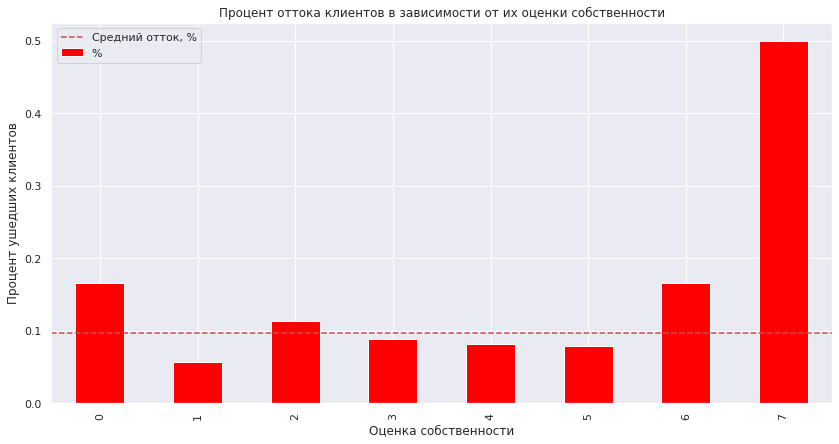

In [128]:
churn_equity2['%'].plot(
    kind='bar', 
    title = 'Процент оттока клиентов в зависимости от их оценки собственности',
    xlabel = 'Оценка собственности', 
    ylabel = 'Процент ушедших клиентов', 
    color = 'red')
plt.axhline(y=group2['churn'].mean(), color='r', linestyle = '--', label='Средний отток, %')
plt.legend()
plt.show()

Во втором сегменте средний отток клиентов составил 10%. Отток выше этого уровня наблюдается у людей, входящих в следующие категории:
- с ожидаемым доходом от 200 000 до 220 000 рублей. Отток на 9 п.п. выше среднего по сегменту;
- возрастом от 50 до 58 лет. Уровень оттока на 16 п.п. выше среднего по сегменту;
- с баллами собственности 0 и 7.

3 группа.

In [129]:
group3['churn'].mean()

0.4822222222222222

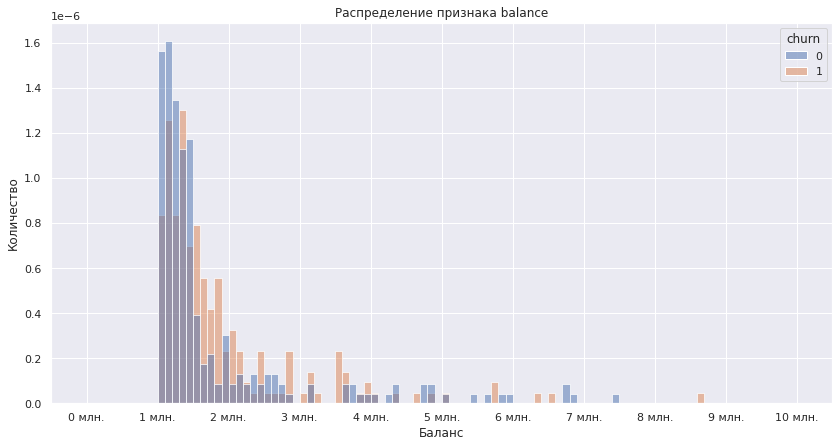

In [130]:
sns.histplot(data=group3, x='balance', hue="churn", stat="density", common_norm=False, bins=[x for x in range(0, 10000001, 100000)])
plt.title('Распределение признака balance')
plt.ylabel("Количество")
plt.xlabel('Баланс')
plt.xticks([x for x in range(0, 10000001, 1000000)], ['{:.0f} млн.'.format(x/1000000) for x in range(0, 10000001, 1000000)])
plt.show()

In [131]:
group3.query('balance >1500000 & balance <=2000000')['churn'].mean()

0.6707317073170732

In [132]:
group3.query('balance >2000000')['churn'].mean()

0.5333333333333333

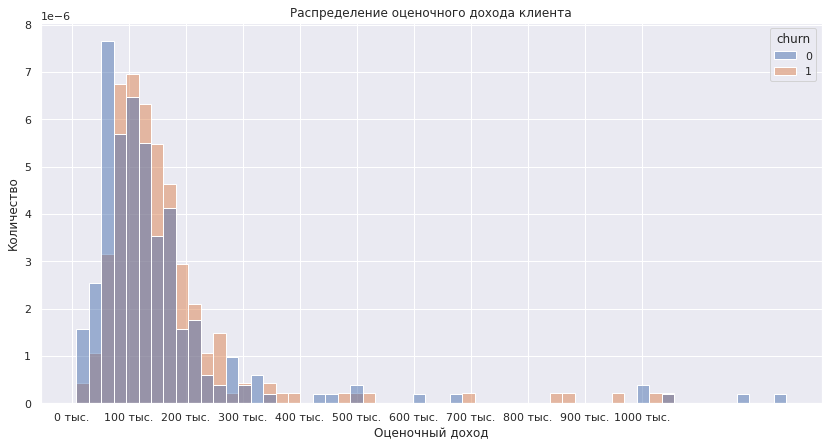

In [133]:
sns.histplot(data=group3, x='est_salary', hue="churn", stat="density", common_norm=False)
plt.title('Распределение оценочного дохода клиента')
plt.ylabel("Количество")
plt.xlabel('Оценочный доход')
plt.xticks([x for x in range(0, 1000001, 100000)], ['{:.0f} тыс.'.format(x/1000) for x in range(0, 1000001, 100000)])
plt.show()

In [134]:
group3.query('est_salary >90000 & est_salary <=400000')['churn'].mean()

0.5298013245033113

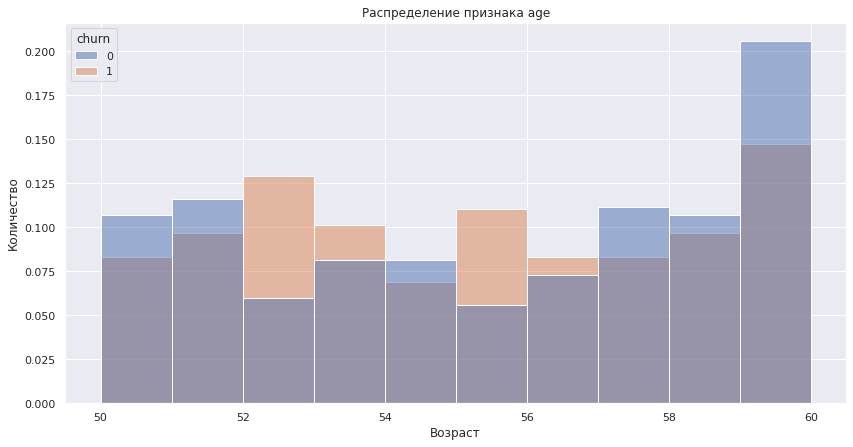

In [135]:
sns.histplot(data=group3, x='age', hue="churn", stat="density", common_norm=False)
plt.title('Распределение признака age')
plt.ylabel("Количество")
plt.xlabel('Возраст')
plt.show()

In [136]:
group3.query('age >=52 & age <= 56')['churn'].mean()

0.5661375661375662

In [137]:
churn_equity = group3.groupby('equity').agg({'churn': ['count', 'mean']})
churn_equity.columns = ['count', '%']
churn_equity = churn_equity.reset_index()
churn_equity

,equity,count,%
0,1,4,0.250
1,2,27,0.556
2,3,82,0.524
3,4,131,0.427
4,5,190,0.474
5,6,8,0.750
6,7,6,0.833
7,8,2,0.500


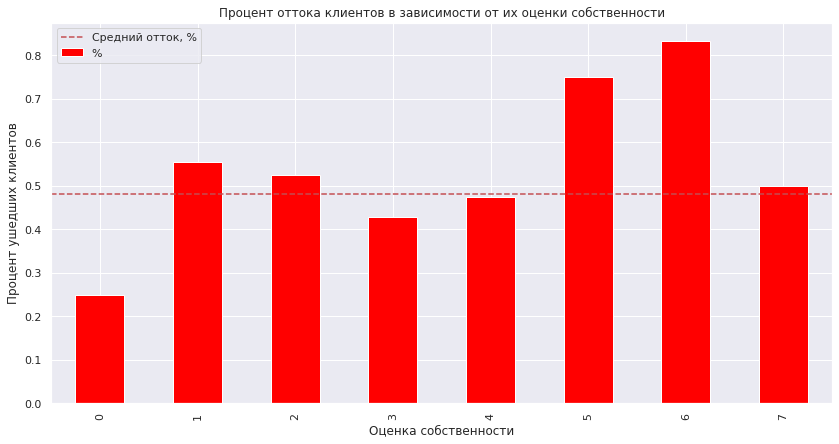

In [138]:
churn_equity['%'].plot(
    kind='bar', 
    title = 'Процент оттока клиентов в зависимости от их оценки собственности',
    xlabel = 'Оценка собственности', 
    ylabel = 'Процент ушедших клиентов', 
    color = 'red')
plt.axhline(y=group3['churn'].mean(), color='r', linestyle = '--', label='Средний отток, %')
plt.legend()
plt.show()

В третьем сегменте средний отток клиентов составил 48%. Отток выше этого уровня наблюдается у людей, входящих в следующие категории:
- с балансом от 1 500 000 до 2 000 000. Отток выше среднего по сегменту на 19 п.п.;
- возрастом от 52 до 56 лет. Уровень оттока на 9 п.п. выше среднего по сегменту;
- с баллами собственности 5 и 6.

### Приоритизация.

Мы провели сегментацию клиентов банка на 3 группы:
- В первый сегмент определили пользователей-мужчин с > 2 продуктами, кредитным скорингом от 750 до 950. Выборка 693 человека;
- Во вторую групппу отобрали женщин с < 3 продуктами, рейтингом < 850, без кредитной карты. Выборка 627 человек;
- В третий сегмент вошли пользователи с балансом от 1 000 000, в возрасте от 50 до 60 лет. Выборка 450 человек.

В первом сегменте средний отток клиентов составил 51%. Отток выше этого уровня наблюдается у людей, входящих в следующие категории:
- с балансом от 1 000 000 до 5 000 000. Там уровень оттока на 20 п.п. выше среднего по сегменту;
- возрастом от 50 до 60 лет. Уровень оттока на 14 п.п. выше среднего по сегменту;
- с баллом собственности 8.

Во втором сегменте средний отток клиентов составил 10%. Отток выше этого уровня наблюдается у людей, входящих в следующие категории:
- с ожидаемым доходом от 200 000 до 220 000 рублей. Отток на 9 п.п. выше среднего по сегменту;
- возрастом от 50 до 58 лет. Уровень оттока на 16 п.п. выше среднего по сегменту;
- с баллами собственности 0 и 7.

В третьем сегменте средний отток клиентов составил 48%. Отток выше этого уровня наблюдается у людей, входящих в следующие категории:
- с балансом от 1 500 000 до 2 000 000. Отток выше среднего по сегменту на 19 п.п.;
- возрастом от 52 до 56 лет. Уровень оттока на 9 п.п. выше среднего по сегменту;
- с баллами собственности 5 и 6.

Поле 'score' для всех сегментов имеет нормальное распределение без выбросов, медиана между 800 и 870 баллами, можно сказать что клиенты в этом диапазоне попадают в группу риска. У 1 сегмента медиана на уровне 850, во 2 сегменте ближе к 800, у 3 - ближе к 870;

По полю 'balance' имеются выбросы в 1 и 3 сегменте.

Распределение возраста: в 1 сегменте медиана на уровне 40 лет, во втором - 45 лет, в третьем 55 из-за выбранных параметров.

Распределение ожидаемого дохода во всех сегментах примерно равно. Выше всего третий квартиль и максимум в 1 сегменте, потом третий сегмент, на последнем месте вторая группа.

## Выводы и рекомендации.

На входе мы получили датафрейм с 10 000 клиентов банка "Метанпром". Стояла задача выявить признаки, по которым высокий отток у пользователей, сделать по ним сегментацию, чтобы выявить критерии, на которые стоит воздействовать для улучшения ситуации по оттоку.

В процессе исследования мы взаимодействовали с данными разных видов: дискретные, бинарные, непрерывные - в связи с этим опираться лишь только на результаты корреляционного анализа не стоит. Выделили сегменты пользователей, которые находятся за пределами +-5п.п. от общего оттока. Наиболее подверженные оттоку сегменты по дискретным признакам:
- Мужчины;
- Без кредитной карты;
- Активные;
- Несколько баллов недвижимости;
- Несколько используемых продуктов.

По непрерывным признакам:
- Видим отток 35% у группы с балансом от 1 000 000 до 2 000 000 000, 49% отток у группы с доходом более 2 000 000;
- Видим отток 35% у группы с рейтингом от 850 до 900;
- Интервал по возрастному признаку от 50 до 60 лет.

Мы провели сегментацию клиентов банка на 3 группы:

- В первый сегмент определили пользователей-мужчин с > 2 продуктами, кредитным скорингом от 750 до 950. Выборка 693 человека;
- Во вторую групппу отобрали женщин с < 3 продуктами, рейтингом < 850, без кредитной карты. Выборка 627 человек;
- В третий сегмент вошли пользователи с балансом от 1 000 000, в возрасте от 50 до 60 лет. Выборка 450 человек.

В первом сегменте средний отток клиентов составил 51%. Отток выше этого уровня наблюдается у людей, входящих в следующие категории:
- С балансом от 1 000 000 до 5 000 000. Там уровень оттока на 20 п.п. выше среднего по сегменту;
- Возрастом от 50 до 60 лет. Уровень оттока на 14 п.п. выше среднего по сегменту;
- С баллом собственности 8.

Во втором сегменте средний отток клиентов составил 10%. Отток выше этого уровня наблюдается у людей, входящих в следующие категории:
- С ожидаемым доходом от 200 000 до 220 000 рублей. Отток на 9 п.п. выше среднего по сегменту;
- Возрастом от 50 до 58 лет. Уровень оттока на 16 п.п. выше среднего по сегменту;
- С баллами собственности 0 и 7.

В третьем сегменте средний отток клиентов составил 48%. Отток выше этого уровня наблюдается у людей, входящих в следующие категории:
- С балансом от 1 500 000 до 2 000 000. Отток выше среднего по сегменту на 19 п.п.;
- Возрастом от 52 до 56 лет. Уровень оттока на 9 п.п. выше среднего по сегменту;
- С баллами собственности 5 и 6.

Из всего исследования можем сделать следующие выводы и рекомендации:
- Высокий уровень оттока у клиентов с балансом от 1 500 000. Следует проверить процентные ставки по вкладам, возможно они не устраивают и пользователи уходят к конкурентам;
- Возрастная группа риска исходя из сегментации 52-56 лет, следует обратить внимание на продукты, предлагаемые этой возрастной категории; Возможно упущение по предпенсионным программам/процентам для пенсионных вкладов;
- У неактивных пользователей отток выше на на 13 п.п., стоит посмотреть на алгоритмы удержания клиента. Проверить отправку уведомлений, работу баннеров в приложении и т.д.
- Для людей с ожидаемым доходом от 200 тыс. до 400 тыс. много уходящих, стоит обратить внимание на предлагаемые бонусы по зарплатным картам;
- У мужчин процент оттока выше, чем у женщин. Стоит обратить внимание, может есть кардинальные различия в условиях по предоставляемым продуктам;
- Значение оттока имеет зависимость от количества продуктов, чем их больше - тем больше шанс потерять клиента. Это может происходить по нескольким причинам, для более подробного анализа нужна информация по каждому продукту, который предоставляется банком. Возможно, люди которые набирают несколько кредитных продуктов не могут впоследствии обслуживать их из-за высоких процентов и уходят к конкурентам. Также конкуренты могут предлагать более выгодные условия, длительность льготного периода, кэшбэки и др. 
- В целом наличие кредитной карты благоприятно сказывается на удержании клиента - 85% клиентов с картой - остаются в банке. В качестве рекомендации - вкладывать больше средств в продвижение этого продукта.